#**Project Based Internship** : Data Scientist - ID/X Partners x Rakamin Academy

#**Prediction Model for Credit Eligibility**

###**Business Understanding**

- Company Background

  ID/X Partners adalah perusahaan konsultan yang dimulai dari tahun 2002. Fokus perusahaan pada solusi Data Analytics untuk manajemen risiko & strategi pemasaran. ID/X mengedepankan nilai CHAMPION, termasuk keputusan berbasis data (Numeric), ketangkasan (Agility), inovasi (Innovative).

- Project Overview

  Proyek ini bertujuan untuk membangun model prediktif untuk mengklasifikasikan calon peminjam termasuk dalam kategori: Bad Loan, dan Good Loan.
  Model ini membantu perusahaan lending dalam membuat keputusan kredit dan meminimalkan risiko gagal bayar

- Problem Statement

  Tingginya tingkat gagal bayar menjadi tantangan utama perusahaan lending dalam menilai kelayakan kredit calon peminjam. Kesalahan penilaian berdampak pada kerugian finansial dan efisiensi operasional.

  Melalui project, "Credit Model ... " akan dibangun solusi end-to-end untuk memprediksi risiko kredit sebelum pinjaman disetujui.

- Goals
  
  Membangun model prediksi risiko kredit (credit risk) untuk mengurangi tingkat gagal bayar & mengoptimalkan profit perusahaan multifinance (lending)

- Objective
  1. Klasifikasi peminjam ke dalam kategori Bad Loan dan Good Loan
  2. Meningkatkan akurasi penilaian risiko sebelum pinjaman disetujui
  3. Mengukur dampak bisnis dari implementasi model prediktif terhadap revenue & risiko

- Business Metrics
  1. High-Risk Rate - Default Rate
  2. Total High-Risk Loan - Exposure at Default (EAD)
  3. Total High-Risk Loss - Expected Loss (EL)
  4. Total Revenue - Expected Interest Income (EII)
  5. Net Revenue - Net Interest Income (NII)

In [18]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, learning_curve, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [19]:
# mount drive
drive.mount('/content/drive')

# file directory
fileName = '/content/drive/My Drive/Credit Risk/loan_data_2007_2014.csv'

Mounted at /content/drive


##**Eksplorasi Data (Data Understanding)**

Melihat Data
- Tipe Data
- Struktur dataset (jumlah baris & kolom)
- Baris Pertama Dataset
- Identifikasi tiap atribut (kolom data)
- Null Numbers/missing value
- Nilai Unique
- Kardinalitas & Redundansi Data
- Statistik Deskriptif
- Distribusi Data

In [20]:
# Baca Data
data = pd.read_csv(fileName, low_memory=True)

/tmp/ipython-input-3937870329.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(fileName, low_memory=True)


In [21]:
# Utility
def judul(title):
  print("\n" + "="*5 + f" {title} " + "="*5)

In [22]:
# ==========================================
# Basic Data Overview
# ==========================================
def cek_data(data, top_n=20):
  judul("CEK DATA")

  # 1. Menampilkan data
  print(f"\nLihat 5 baris pertama: {data.head()}")
  print(f"\nLihat 5 baris acak: {data.sample(5, random_state=42)}")

  # 2. Identifikasi dimensi data (baris & kolom)
  print(f"\nJumlah baris: {data.shape[0]}")
  print(f"\nJumlah kolom: {data.shape[1]}")

  # 3. Melihat informasi dataset
  print(f"\nInformasi dataset: {data.info()}")

  # 4. Identifikasi tipe data
  print("\nJumlah Tipe Data")
  display(data.dtypes.value_counts())

cek_data(data)


===== CEK DATA =====

Lihat 5 baris pertama:    Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade  ... total_bal_il il_util  \
0   36 months     10.65       162.87     B  ...          NaN     NaN   
1   60 months     15.27        59.83     C  ...          NaN     NaN   
2   36 months     15.96        84.33     C  ...          NaN     NaN   
3   36 months     13.49       339.31     C  ...          NaN     NaN   
4   60 months     12.69        67.79     B  ...          NaN     NaN   

  open_rv_12m open_rv_24m  max_bal_bc all_util total

float64    46
object     22
int64       7
Name: count, dtype: int64

> Hasil eksplorasi struktur data:

Dataset terdiri dari 75 kolom dan 466285 baris dengan tipe data float berjumlah 46, integer berjumlah 7, dan object berjumlah 22.
Beberapa kolom memiliki nilai kosong, terdapat beberapa kolom sepenuhnya kosong.

### Cek Data Tanggal

In [23]:
# ==========================================
# Cek Data Tanggal (Invalid Format)
# ==========================================
def cek_tgl(data, nilai=20):
  judul("CEK FORMAT TANGGAL")
  # Cari kolom yang mungkin bertipe tanggal
  possible_date = []
  for col in data.select_dtypes(include=['object']).columns:
    sample = data[col].dropna().astype(str).head(nilai)

    if sample.str.contains(r"^[A-Za-z]{3}-\d{2}$").any():
      possible_date.append(col)
      print(f"\nKolom '{col}' dengan format M-Y")
      print(f"Lihat nilai: {sample.tolist()[:5]}")

  return possible_date

cek_tgl(data)



===== CEK FORMAT TANGGAL =====

Kolom 'issue_d' dengan format M-Y
Lihat nilai: ['Dec-11', 'Dec-11', 'Dec-11', 'Dec-11', 'Dec-11']

Kolom 'earliest_cr_line' dengan format M-Y
Lihat nilai: ['Jan-85', 'Apr-99', 'Nov-01', 'Feb-96', 'Jan-96']

Kolom 'last_pymnt_d' dengan format M-Y
Lihat nilai: ['Jan-15', 'Apr-13', 'Jun-14', 'Jan-15', 'Jan-16']

Kolom 'next_pymnt_d' dengan format M-Y
Lihat nilai: ['Feb-16', 'Feb-16', 'Jan-16', 'Jan-16', 'Jan-16']

Kolom 'last_credit_pull_d' dengan format M-Y
Lihat nilai: ['Jan-16', 'Sep-13', 'Jan-16', 'Jan-15', 'Jan-16']


['issue_d',
 'earliest_cr_line',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d']

> Ubah format tipe data dari object menjadi datetime untuk keperluan analisis

### Invalid Data Type

In [24]:
# Data Preparation
# ==========================================
# Konversi Tipe Data Tanggal
# ==========================================
def convert_tgl(data):
  judul("KONVERSI FORMAT TANGGAL")

  column = ["issue_d", "earliest_cr_line", "last_pymnt_d", "next_pymnt_d", "last_credit_pull_d"]
  for col in column:
     data[col] = pd.to_datetime(data[col], errors='coerce', format="%b-%y")
     print(f"✅ Kolom '{col}' dikonversi ke datetime")

convert_tgl(data)


===== KONVERSI FORMAT TANGGAL =====
✅ Kolom 'issue_d' dikonversi ke datetime
✅ Kolom 'earliest_cr_line' dikonversi ke datetime
✅ Kolom 'last_pymnt_d' dikonversi ke datetime
✅ Kolom 'next_pymnt_d' dikonversi ke datetime
✅ Kolom 'last_credit_pull_d' dikonversi ke datetime


> Hasil eksplorasi struktur data:

Ada data tanggal bertipe object sehingga perlu dilakukan konversi menjadi tipe datetime

In [25]:
# ==========================================
# Statistik Deskriptif
# ==========================================
def cek_cardinality(data, cat_thresh=50):
  judul("STATISTIK DESKRIPTIF")

  # Deskriptif Numeric Data
  print("\nDeskriptif Numerik Data:")
  display(data.select_dtypes(include=[np.number]).describe().T)

  # Statistik Deskriptif Data Kategorikal (Object)
  print("\nDeskriptif Data Kategorikal (Object):")
  display(data.select_dtypes(include=['object','category']).describe().T)

cek_cardinality(data)


===== STATISTIK DESKRIPTIF =====

Deskriptif Numerik Data:


count          mean           std       min  \
Unnamed: 0                   466285.0  2.331420e+05  1.346050e+05      0.00   
id                           466285.0  1.307973e+07  1.089371e+07  54734.00   
member_id                    466285.0  1.459766e+07  1.168237e+07  70473.00   
loan_amnt                    466285.0  1.431728e+04  8.286509e+03    500.00   
funded_amnt                  466285.0  1.429180e+04  8.274371e+03    500.00   
funded_amnt_inv              466285.0  1.422233e+04  8.297638e+03      0.00   
int_rate                     466285.0  1.382924e+01  4.357587e+00      5.42   
installment                  466285.0  4.320612e+02  2.434855e+02     15.67   
annual_inc                   466281.0  7.327738e+04  5.496357e+04   1896.00   
dti                          466285.0  1.721876e+01  7.851121e+00      0.00   
delinq_2yrs                  466256.0  2.846784e-01  7.973651e-01      0.00   
inq_last_6mths               466256.0  8.047446e-01  1.091598e+00      0.00   
mths_since_last_delinq       215934.0  3.410443e+01  2.177849e+01      0.00   
mths_since_last_record        62638.0  7.430601e+01  3.035765e+01      0.00   
open_acc                     466256.0  1.118707e+01  4.987526e+00      0.00   
pub_rec                      466256.0  1.605642e-01  5.108626e-01      0.00   
revol_bal                    466285.0  1.623020e+04  2.067625e+04      0.00   
revol_util                   465945.0  5.617695e+01  2.373263e+01      0.00   
total_acc                    466256.0  2.506443e+01  1.160014e+01      1.00   
out_prncp                    466285.0  4.410062e+03  6.355079e+03      0.00   
out_prncp_inv                466285.0  4.408452e+03  6.353198e+03      0.00   
total_pymnt                  466285.0  1.154069e+04  8.265627e+03      0.00   
total_pymnt_inv              466285.0  1.146989e+04  8.254158e+03      0.00   
total_rec_prncp              466285.0  8.866015e+03  7.031688e+03      0.00   
total_rec_int                466285.0  2.588677e+03  2.483810e+03      0.00   
total_rec_late_fee           466285.0  6.501292e-01  5.265730e+00      0.00   
recoveries                   466285.0  8.534421e+01  5.522161e+02      0.00   
collection_recovery_fee      466285.0  8.961534e+00  8.549144e+01      0.00   
last_pymnt_amnt              466285.0  3.123914e+03  5.554737e+03      0.00   
collections_12_mths_ex_med   466140.0  9.085253e-03  1.086484e-01      0.00   
mths_since_last_major_derog   98974.0  4.285255e+01  2.166259e+01      0.00   
policy_code                  466285.0  1.000000e+00  0.000000e+00      1.00   
annual_inc_joint                  0.0           NaN           NaN       NaN   
dti_joint                         0.0           NaN           NaN       NaN   
verification_status_joint         0.0           NaN           NaN       NaN   
acc_now_delinq               466256.0  4.002093e-03  6.863680e-02      0.00   
tot_coll_amt                 396009.0  1.919135e+02  1.463021e+04      0.00   
tot_cur_bal                  396009.0  1.388017e+05  1.521147e+05      0.00   
open_acc_6m                       0.0           NaN           NaN       NaN   
open_il_6m                        0.0           NaN           NaN       NaN   
open_il_12m                       0.0           NaN           NaN       NaN   
open_il_24m                       0.0           NaN           NaN       NaN   
mths_since_rcnt_il                0.0           NaN           NaN       NaN   
total_bal_il                      0.0           NaN           NaN       NaN   
il_util                           0.0           NaN           NaN       NaN   
open_rv_12m                       0.0           NaN           NaN       NaN   
open_rv_24m                       0.0           NaN           NaN       NaN   
max_bal_bc                        0.0           NaN           NaN       NaN   
all_util                          0.0           NaN           NaN       NaN   
total_rev_hi_lim             396009.0  3.037909e+04  3.724713e+04      0.00   
inq


Deskriptif Data Kategorikal (Object):


count  unique  \
term                 466285       2   
grade                466285       7   
sub_grade            466285      35   
emp_title            438697  205475   
emp_length           445277      11   
home_ownership       466285       6   
verification_status  466285       3   
loan_status          466285       9   
pymnt_plan           466285       2   
url                  466285  466285   
desc                 125981  124435   
purpose              466285      14   
title                466264   63098   
zip_code             466285     888   
addr_state           466285      50   
initial_list_status  466285       2   
application_type     466285       1   

                                                                   top    freq  
term                                                         36 months  337953  
grade                                                                B  136929  
sub_grade                                                           B3   31686  
emp_title                                                      Teacher    5399  
emp_length                                                   10+ years  150049  
home_ownership                                                MORTGAGE  235875  
verification_status                                           Verified  168055  
loan_status                                                    Current  224226  
pymnt_plan                                                           n  466276  
url                  https://www.lendingclub.com/browse/loanDetail....       1  
desc                                                                       234  
purpose                                             debt_consolidation  274195  
title                                               Debt consolidation  164075  
zip_code                                                         945xx    5304  
addr_state                                                          CA   71450  
initial_list_status                                                  f  303005  
application_type                                            INDIVIDUAL  466285

###Unique Values

In [26]:
# ==========================================
# Unique Values
# ==========================================
def cek_unique(data, top_n=20):
  judul("CEK UNIQUE VALUES")

  # Hitung jumlah nilai unik di setiap kolom
  jumlah_unique = data.nunique().sort_values(ascending=False)
  print(f"\nTop {top_n} Jumlah nilai unik terbanyak:")
  print(jumlah_unique.head(top_n))

  print(f"\nTop {top_n} Jumlah nilai unik paling sedikit:")
  print(jumlah_unique.tail(top_n))

cek_unique(data)


===== CEK UNIQUE VALUES =====

Top 20 Jumlah nilai unik terbanyak:
Unnamed: 0                 466285
id                         466285
member_id                  466285
url                        466285
total_pymnt                351609
total_pymnt_inv            347659
total_rec_int              270249
tot_cur_bal                220690
emp_title                  205475
last_pymnt_amnt            198194
total_rec_prncp            172713
out_prncp_inv              141189
out_prncp                  135665
desc                       124435
title                       63098
revol_bal                   58142
installment                 55622
annual_inc                  31901
recoveries                  22773
collection_recovery_fee     20275
dtype: int64

Top 20 Jumlah nilai unik paling sedikit:
initial_list_status          2
policy_code                  1
application_type             1
annual_inc_joint             0
dti_joint                    0
verification_status_joint    0
open_il_6m 

###Distribusi Data

In [27]:
# Cari Kandidat Target yang Berhubungan dengan Status Pinjaman
# Lihat Distribusinya
def find_target(data):
    # Filter berdasarkan kata kunci
    keyword = [col for col in data.columns if "status" in col.lower() or "default" in col.lower()]

    print("🔎 Kandidat Target berdasarkan keywords: ")
    if keyword:
      for col in keyword:
        print(f"\n - {col} (unique={data[col].nunique()})")
        print(data[col].value_counts(dropna=False))
        print("\nDistribusi (%):")
        print(data[col].value_counts(normalize=True, dropna=False) * 100)
    else:
      print("Tidak ada kolom yang cocok")

    return keyword

candidates = find_target(data)


🔎 Kandidat Target berdasarkan keywords: 

 - verification_status (unique=3)
verification_status
Verified           168055
Source Verified    149993
Not Verified       148237
Name: count, dtype: int64

Distribusi (%):
verification_status
Verified           36.041262
Source Verified    32.167666
Not Verified       31.791072
Name: proportion, dtype: float64

 - loan_status (unique=9)
loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

Distribusi (%):
loa

Identifikasi Fitur (Numerik, Kategorikal)

In [28]:
def identifikasi_fitur(data):

    # Fitur numerik murni (int/float)
    numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

    # Fitur kategorikal murni (object, category, bool)
    categorical_features = data.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

    # Print hasil
    print("Fitur Numerik:")
    print(numerical_features)

    print("\nFitur Kategorikal:")
    print(categorical_features)

    return {
        "numerik": numerical_features,
        "kategorikal": categorical_features,
    }

result = identifikasi_fitur(data)


Fitur Numerik:
['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m']

Fitur Kategorikal:
['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_stat

## EDA - Exploratory Data Analysis

> Identifikasi pola awal

> Insight untuk hipotesis awal modeling

###Univariate Analysis

> Melakukan analisis univariat untuk wawasan mendalam data, berupa visualisasi distribusi tiap fitur untuk memahami hub antar variabel

- Histogram: distribusi numerik

- Boxplot: outlier

- Countplot & Barplot: distribusi kategorikal

- Scatterplot: hubungan antar variabel

Histogram

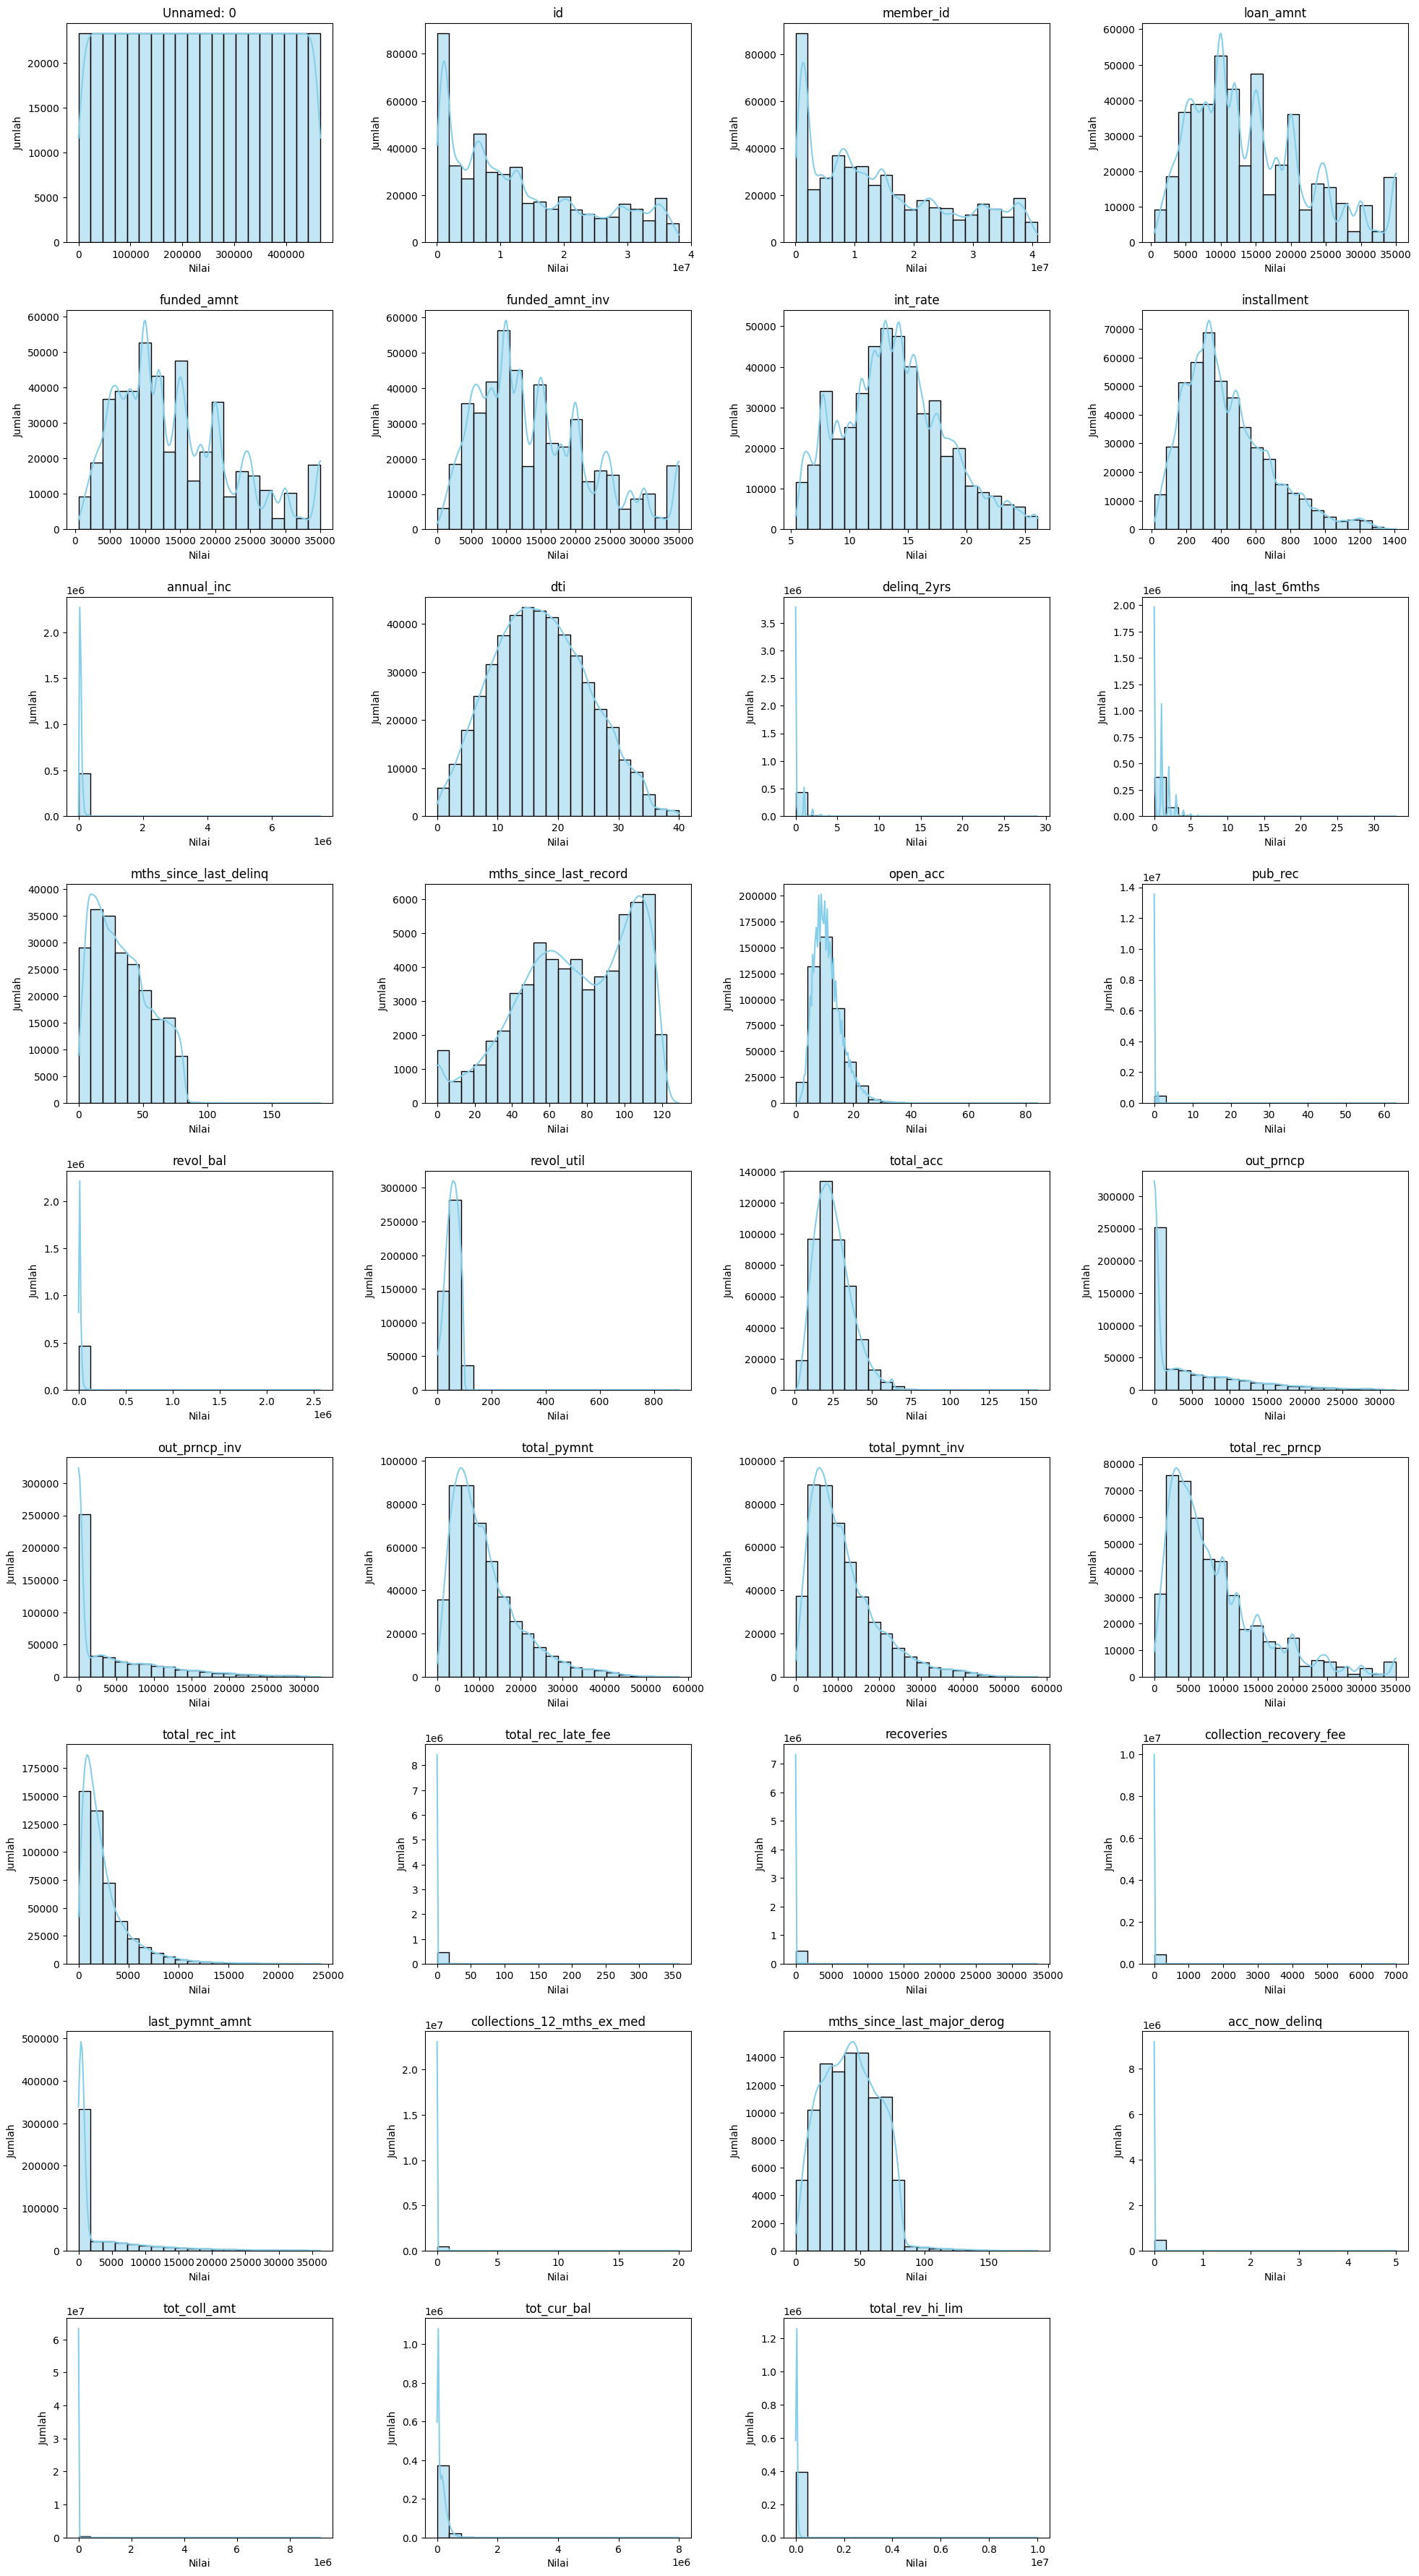

In [29]:
# Histogram untuk Numerik → Distribusi Skewed

# Ambil Numerical Columns
non_empty = data.columns[data.notna().any()]
num_columns = data[non_empty].drop(columns=['policy_code']).select_dtypes('number').columns

def plot_hist(data, col_list):
  n_col = 4
  n_rows = int(np.ceil(len(col_list) / n_col))

  fig, axes = plt.subplots(n_rows, n_col, figsize=(20, n_rows*4))
  axes = axes.flatten()

  # plotting
  for i, feature in enumerate(col_list):
    sns.histplot(x=data[feature], ax=axes[i], kde=True, bins=20, color='skyblue')
    axes[i].set_title(feature)
    axes[i].set_xlabel('Nilai')
    axes[i].set_ylabel('Jumlah')

  # remove subplots
  for j in range(len(col_list), len(axes)):
    # remove empty axes
    fig.delaxes(axes[j])

  plt.tight_layout(pad=2.0)
  plt.show()

plot_hist(data, num_columns)

Histogram menunjukkan distribusi numerik non empty. Ini berguna untuk handling missing values dan outliers

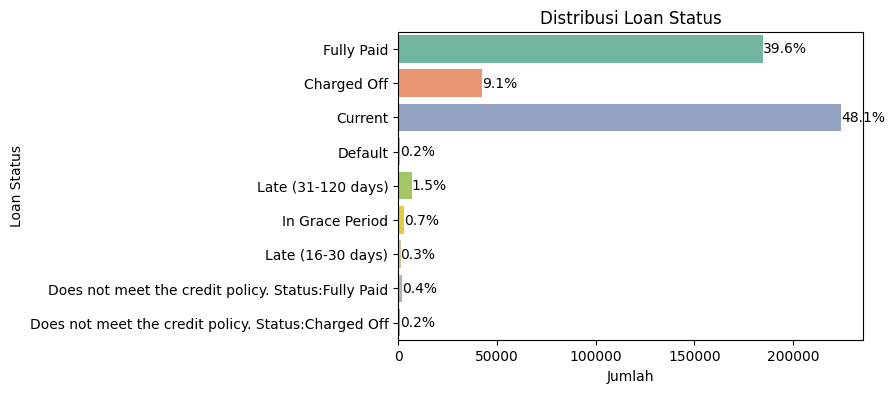

In [ ]:
# ==========================================
# Distribusi Target 'loan_status'
# ==========================================

# Visualisasi
if 'loan_status' in data.columns:
  plt.figure(figsize=(6,4))
  plot = sns.countplot(
      y=data['loan_status'],
      data=data,
      palette="Set2",
      hue=data['loan_status'],
      legend=False)

  total = len(data['loan_status'])

  # Tambahkan label persentase
  for c in plot.containers:
    plot.bar_label(c, fmt=lambda v: f'{(v/total)*100:0.1f}%')
    # plot.bar_label(c)

  plt.ylabel('Loan Status')
  plt.xlabel('Jumlah')
  plt.title("Distribusi Loan Status")
  plt.show()


Distribusi Kelas:
                      Jumlah Verifikasi  Distribusi (%)
verification_status                                   
Verified                        168055       36.041262
Source Verified                 149993       32.167666
Not Verified                    148237       31.791072


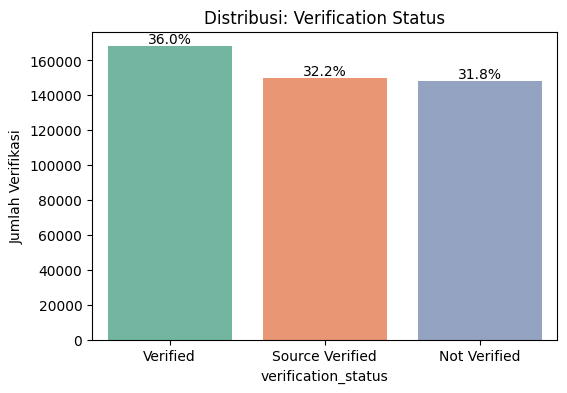

In [ ]:
# ==========================================
# Distribusi Target 'verification_status'
# ==========================================

# Hitung Distribusi Target
jumlah_ver = data["verification_status"].value_counts()
percent_ver = data["verification_status"].value_counts(normalize=True)*100

# Tampilkan Distribusi
print("Distribusi Kelas:\n", pd.DataFrame({"Jumlah Verifikasi": jumlah_ver, "Distribusi (%)": percent_ver}))

if "verification_status" in data.columns:
# Visualisasi
  plt.figure(figsize=(6,4))
  # sns.set_style('whitegrid')
  plot = sns.countplot(
      x='verification_status',
      data=data,
      hue='verification_status',
      palette="Set2",
      legend=False)

  total = len(data['verification_status'])

  # Tambahkan label persentase
  for c in plot.containers:
    plot.bar_label(c, fmt=lambda v: f'{(v/total)*100:0.1f}%')
    # plot.bar_label(c)


  plt.ylabel('Jumlah Verifikasi')
  plt.title("Distribusi: Verification Status")
  plt.show()

Distribusi Kelas:
                      Jumlah Status Awal  Distribusi (%)
initial_list_status                                    
f                                303005       64.982789
w                                163280       35.017211


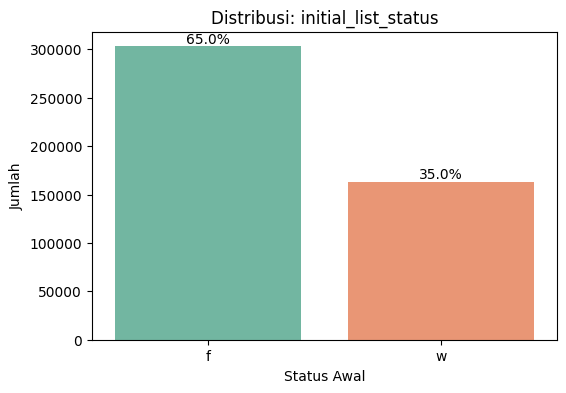

In [ ]:
# ==========================================
# Distribusi Target 'initial_list_status (status awal peminjam)'
# ==========================================

# Hitung Distribusi Target
jumlah_stat = data["initial_list_status"].value_counts()
percent_stat = data["initial_list_status"].value_counts(normalize=True)*100

# Tampilkan Distribusi
print("Distribusi Kelas:\n", pd.DataFrame({"Jumlah Status Awal": jumlah_stat, "Distribusi (%)": percent_stat}))

if "initial_list_status" in data.columns:
# Visualisasi
  plt.figure(figsize=(6,4))
  # sns.set_style('whitegrid')
  plot = sns.countplot(
      x='initial_list_status',
      data=data,
      hue='initial_list_status',
      palette="Set2",
      legend=False)

  total = len(data['initial_list_status'])

  # Tambahkan label persentase
  for c in plot.containers:
    plot.bar_label(c, fmt=lambda v: f'{(v/total)*100:0.1f}%')
    # plot.bar_label(c)

  plt.ylabel('Jumlah')
  plt.xlabel('Status Awal')
  plt.title("Distribusi: initial_list_status")
  plt.show()

Boxplot: Outlier

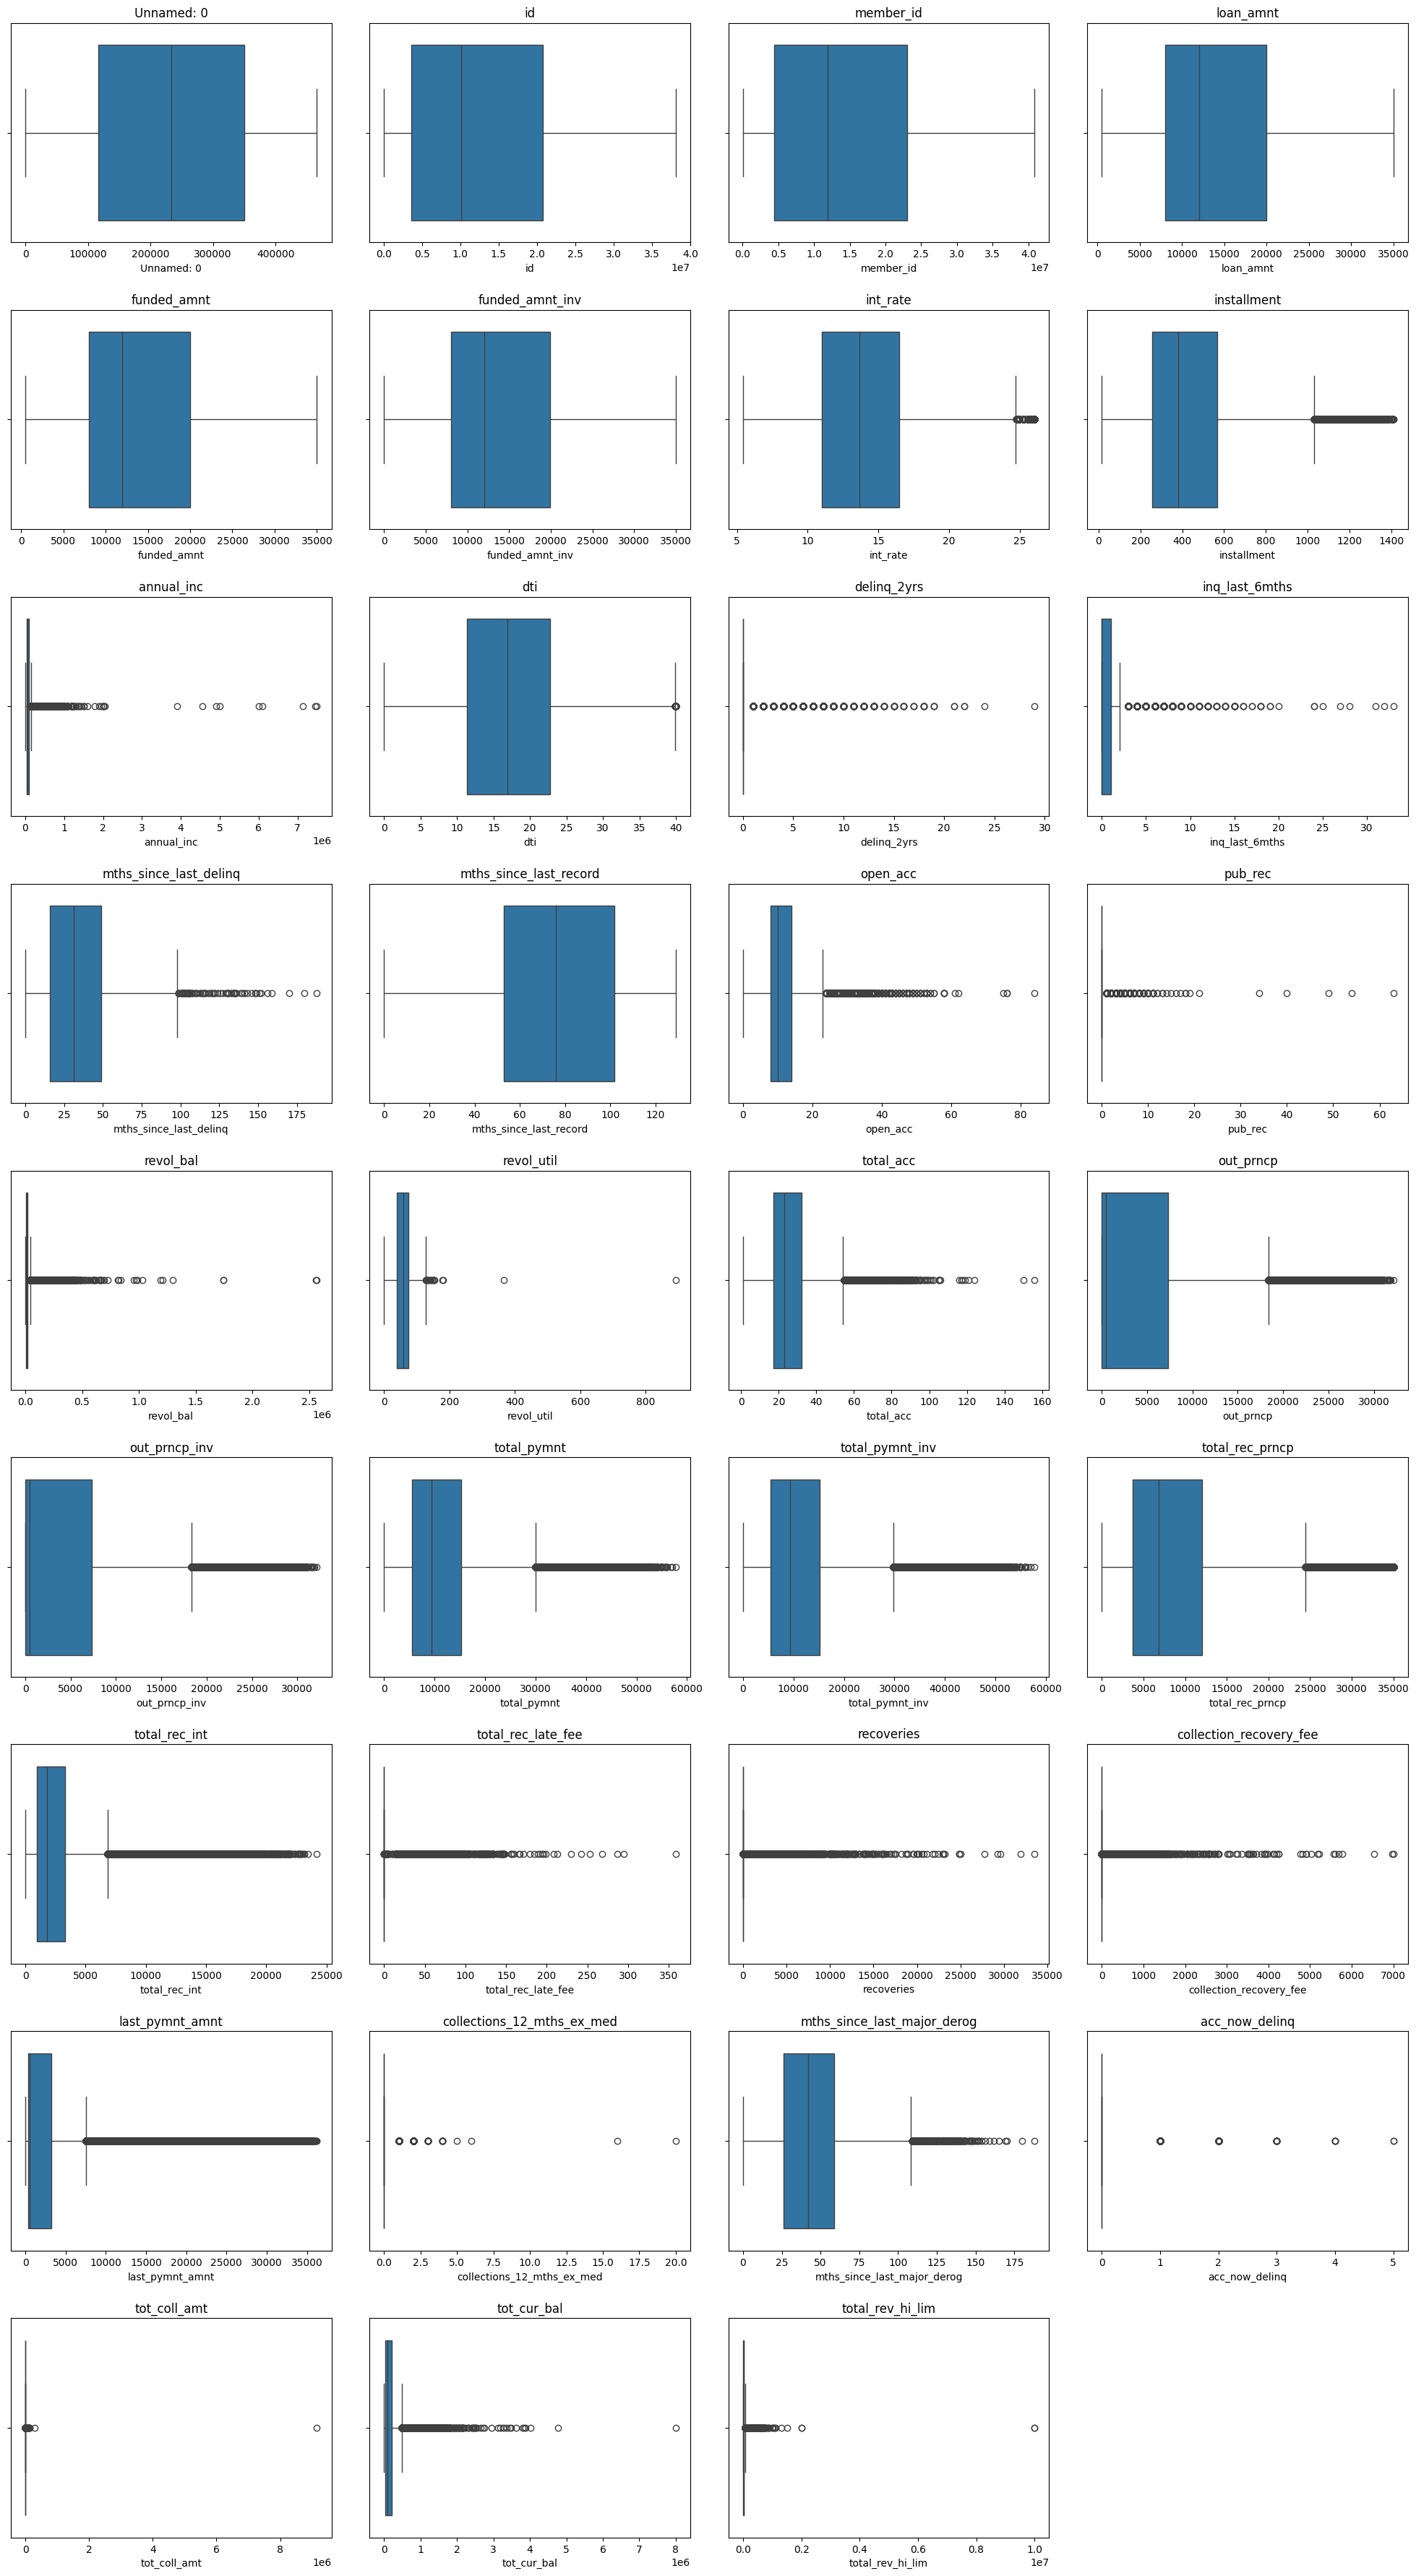

In [ ]:
# plot outliers using boxplot
def plot_outliers(data, col_list):
  n_col = 4
  n_rows = int(np.ceil(len(col_list) / n_col))

  fig, axes = plt.subplots(n_rows, n_col, figsize=(20, n_rows*4))

  # flatten axes
  axes = axes.flatten()

  # outlier plotting
  for i, feature in enumerate(col_list):
    sns.boxplot(x=data[feature], ax=axes[i])
    axes[i].set_title(feature)

  # remove subplots
  for j in range(len(col_list), len(axes)):
    fig.delaxes(axes[j]) # remove empty axes

  plt.tight_layout(pad=2.0)
  plt.show()

plot_outliers(data, num_columns)

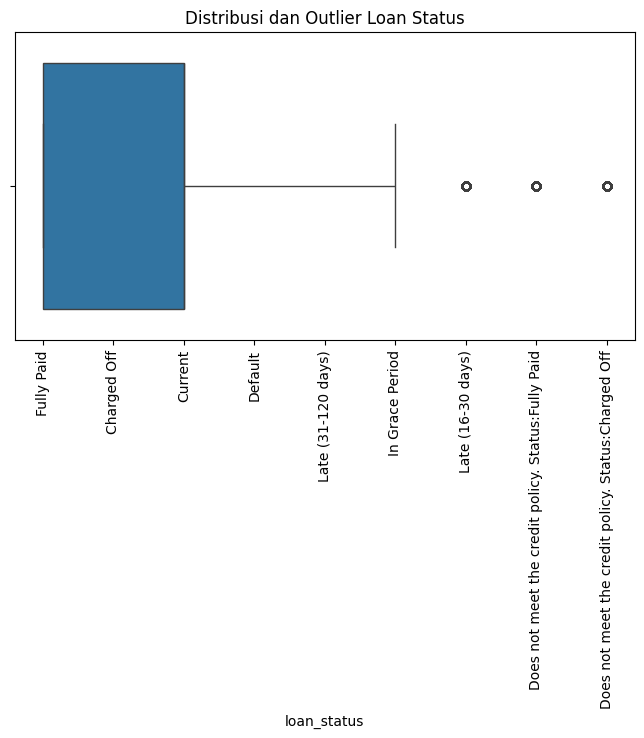

In [ ]:
# ==========================================
# Deteksi Outlier → cek apakah ada nilai ekstrim
# ==========================================
# Contoh: cek distribusi kolom 'loan_status'

if 'loan_status' in data.columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=data['loan_status'])
    plt.title("Distribusi dan Outlier Loan Status")
    plt.xticks(rotation=90)
    plt.show()

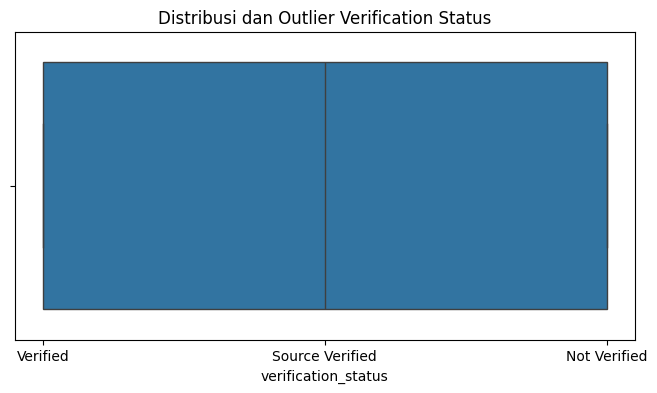

In [ ]:
# ==========================================
# Deteksi Outlier Sederhana → cek apakah ada nilai ekstrim yang aneh
# Boxplot
# ==========================================
# Contoh: cek distribusi kolom 'verification_status'
if 'verification_status' in data.columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=data['verification_status'])
    plt.title("Distribusi dan Outlier Verification Status")
    plt.show()

Countplot & Barplot: distribusi kategorikal

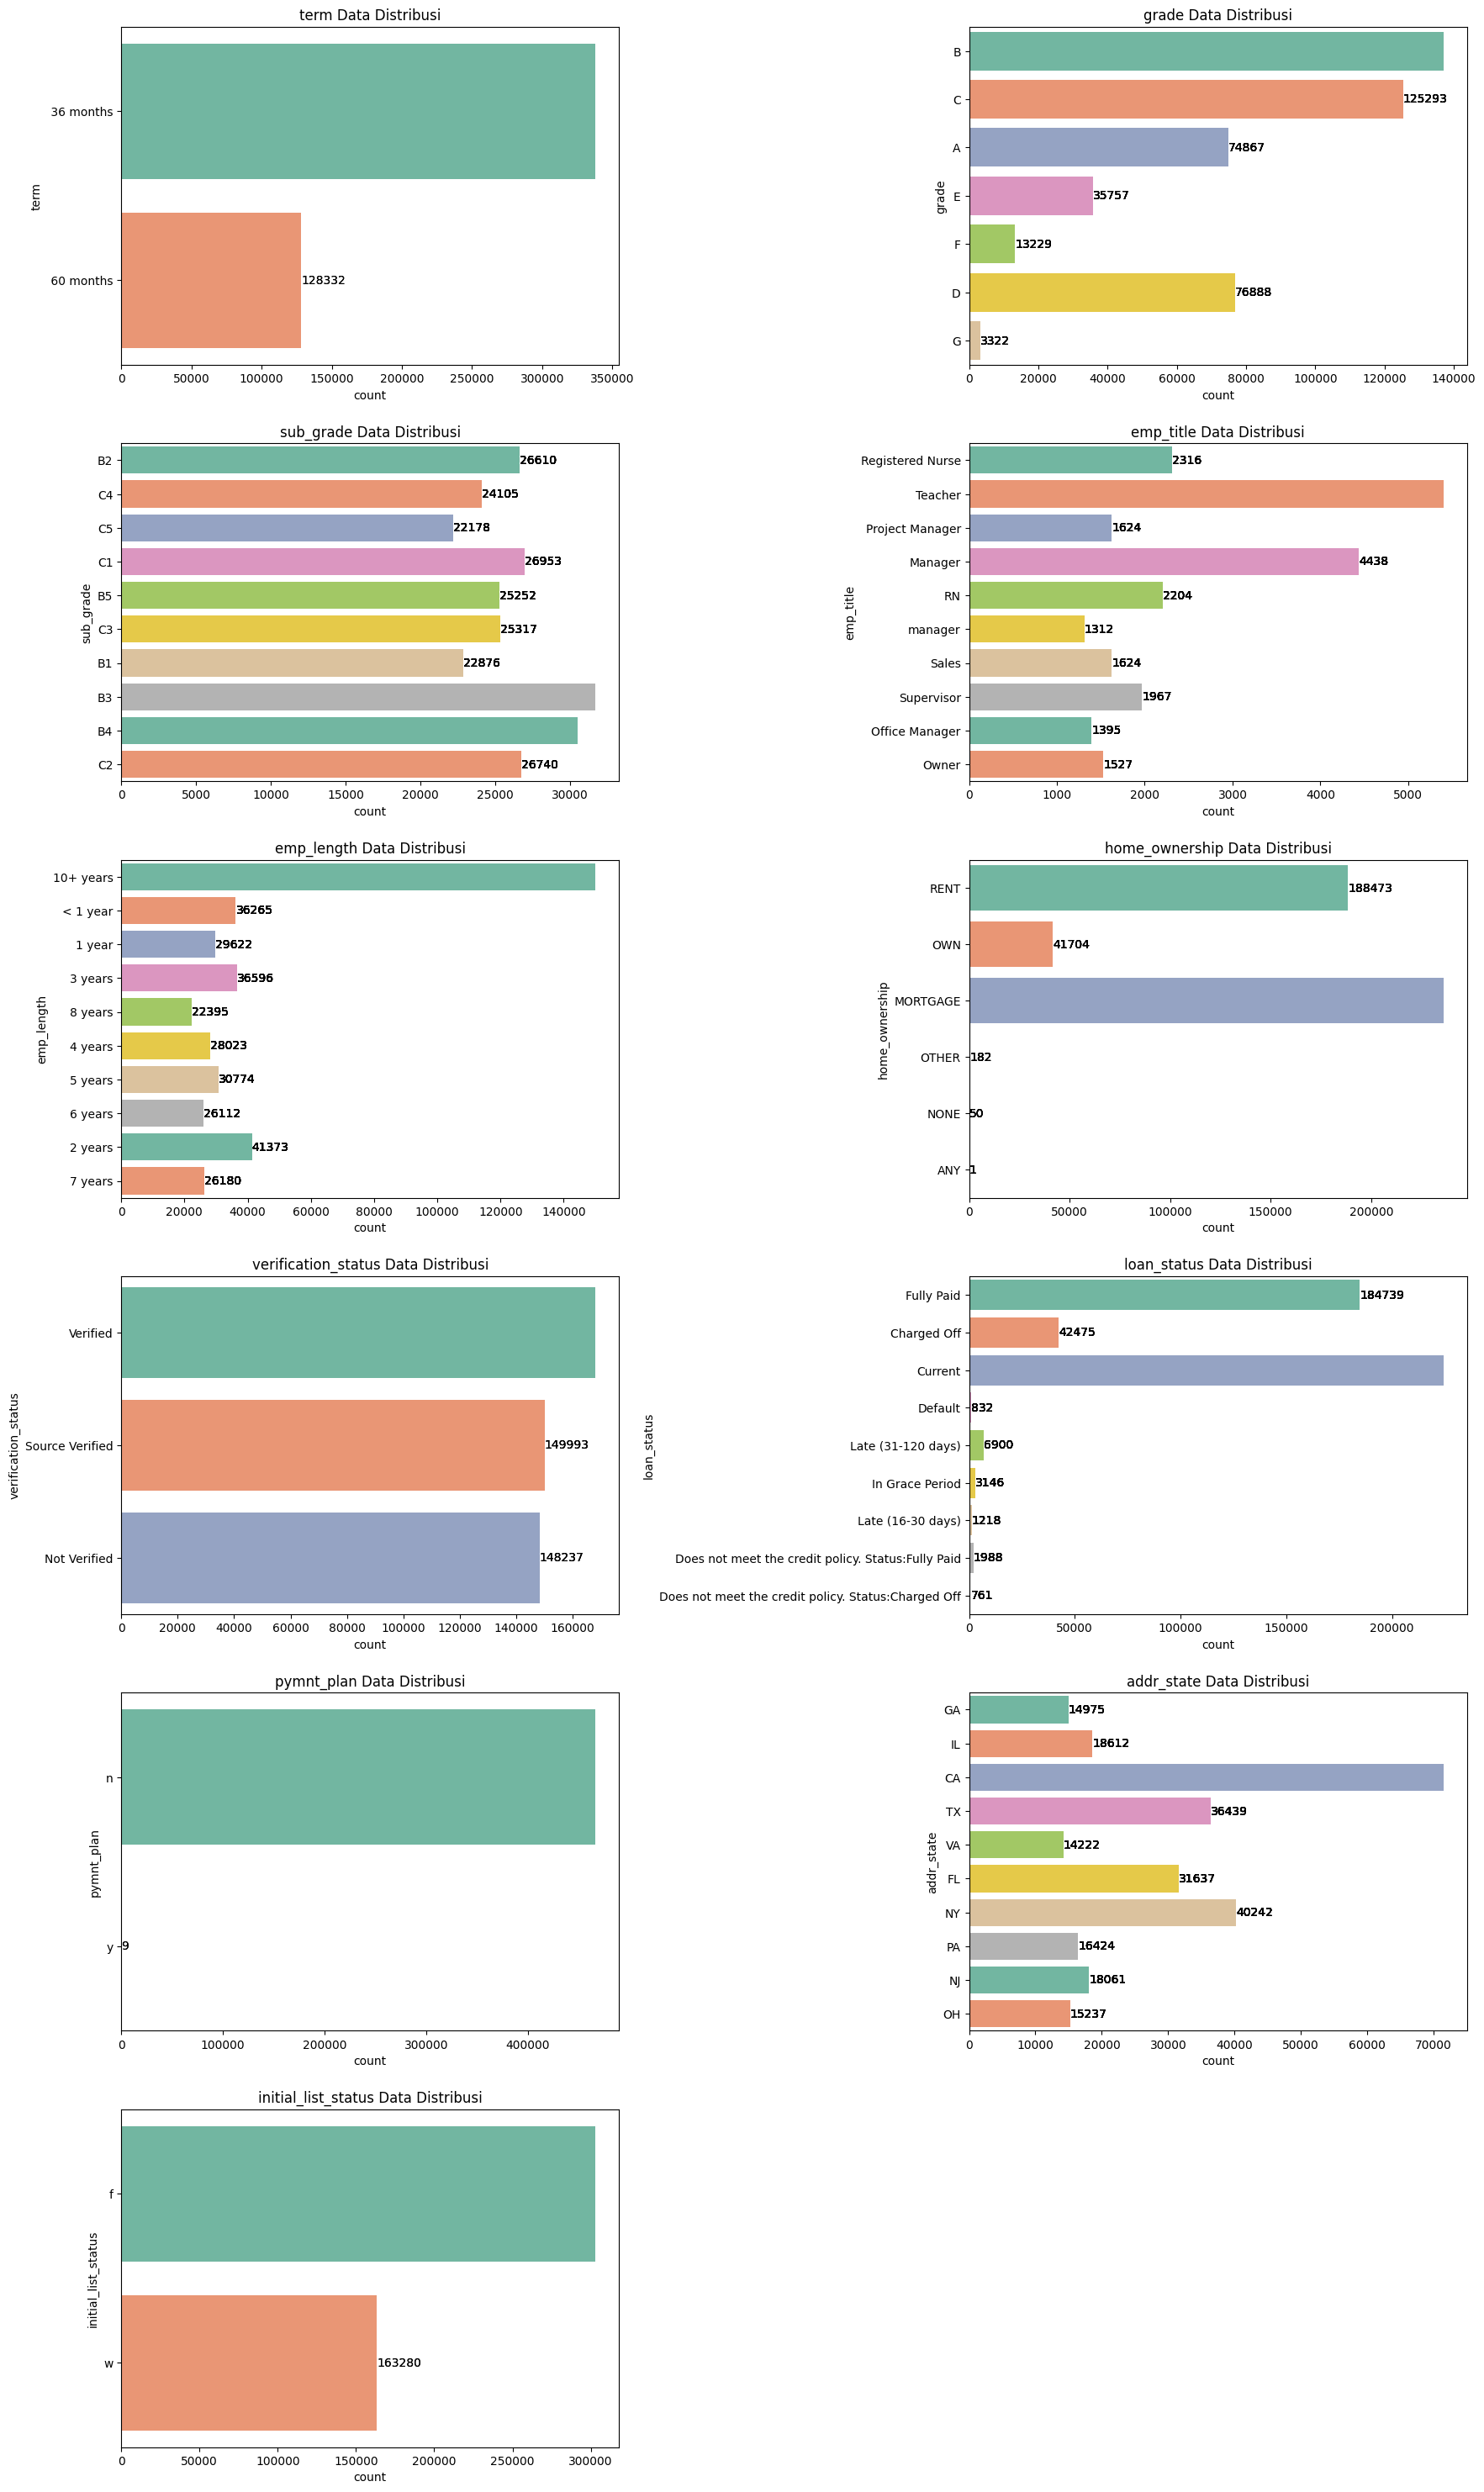

In [ ]:
# ==========================================
# Barplot → Kategorikal terbatas (top 10 kategori)
# ==========================================

# Tampilkan kolom kategorikal
cat_col = data.select_dtypes('object').columns
cat_col

# Plot Categorical Data Distribution
def plot_cat_dist(data, col_list):
  n_col = 2
  n_rows = int(np.ceil(len(col_list) / n_col))

  fig, axes = plt.subplots(n_rows, n_col, figsize=(18, n_rows*5))

  # flatten axes
  axes = axes.flatten()

  for i, feat in enumerate(col_list):
    # display only the top 10 values
    if data[feat].nunique() > 10:
      top = data[feat].value_counts().nlargest(10).index
      filter_data = data[data[feat].isin(top)]
    else:
      filter_data = data

    plot = sns.countplot(y=filter_data[feat], ax=axes[i], hue=filter_data[feat], palette='Set2')
    axes[i].set_title(f'{feat} Data Distribusi')

    # add labels
    for p in plot.patches:
      for bar in plot.patches:
        value = bar.get_width()
        pos = bar.get_x() + value

        # show the labels that are within 90% of the border
        if pos < plot.get_xlim()[1] * 0.9:
          plot.text(value,
                  bar.get_y() + bar.get_height() / 2,
                  f'{int(value)}',
                  ha='left', va='center', fontsize=10)

  # remove unused subplots
  for j in range(len(col_list), len(axes)):
    fig.delaxes(axes[j]) # remove empty axes

  plt.tight_layout(pad=2.0)
  plt.show()

cat_plot = [col for col in cat_col if col not in ['url', 'desc', 'purpose', 'title', 'zip_code', 'application_type']]
plot_cat_dist(data, cat_plot)

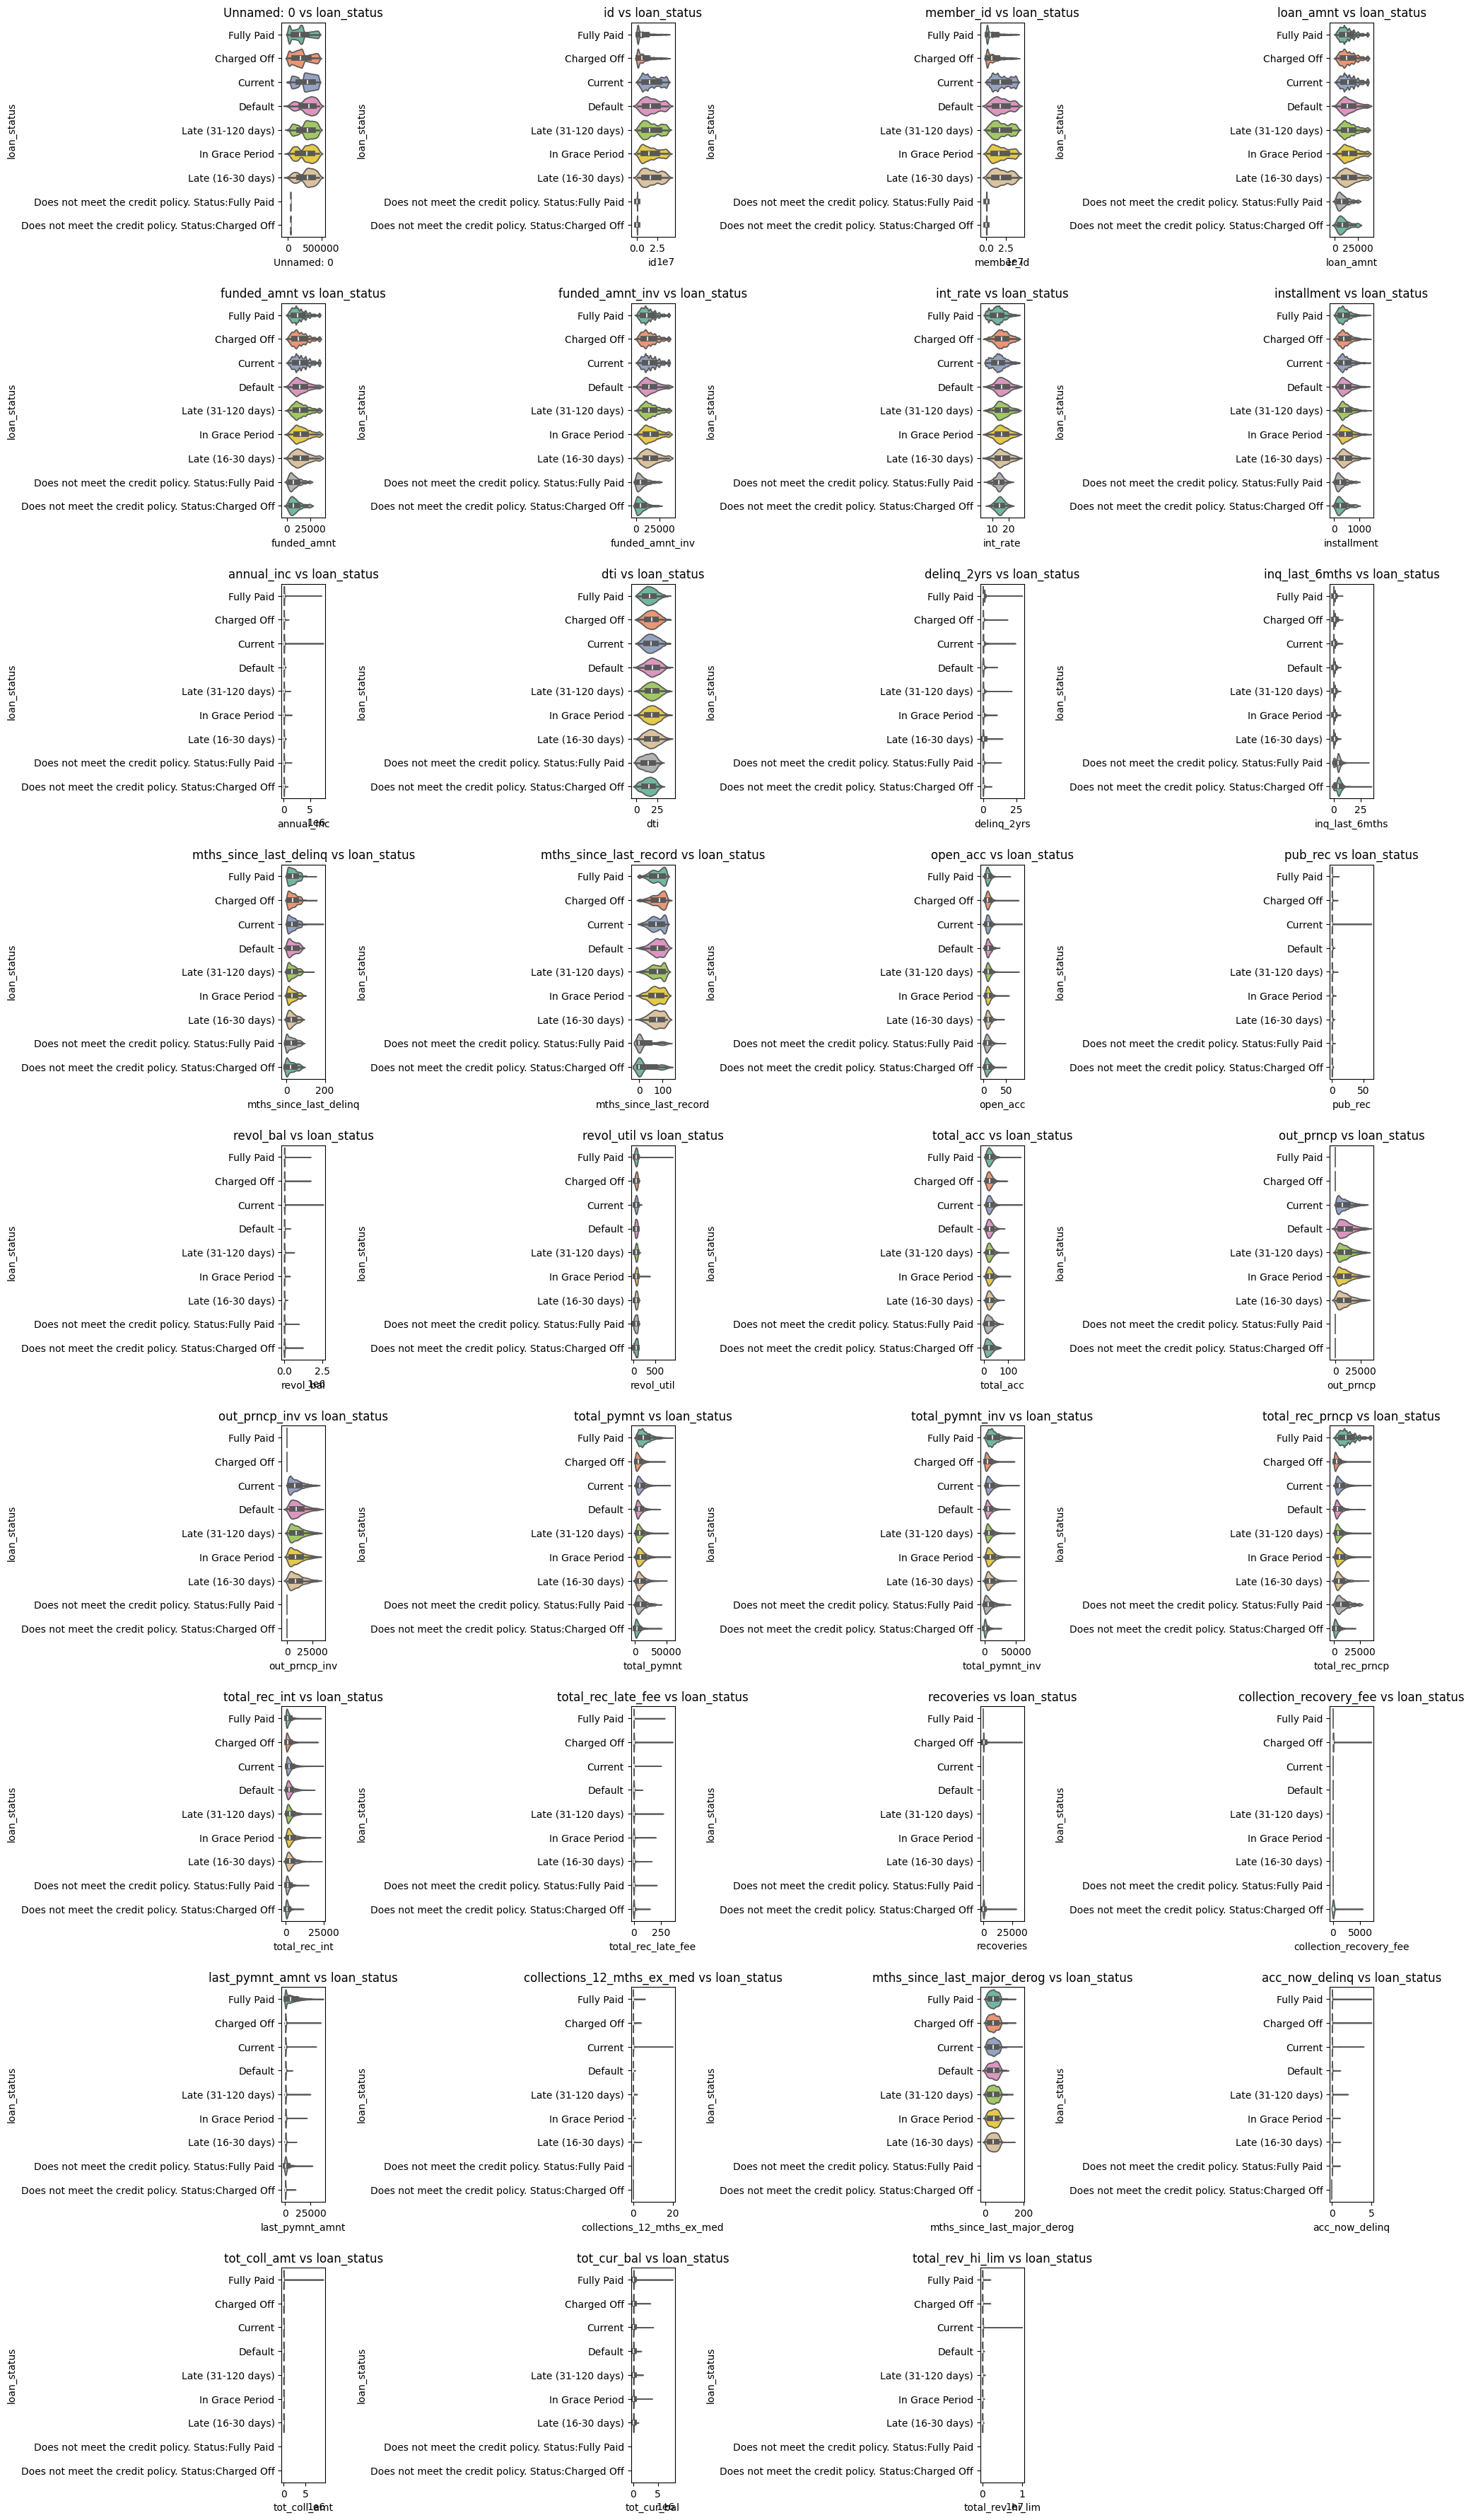

In [ ]:
# Violin plot untuk melihat distribusi data untuk setiap variabel dan target
# Target Kategori
target_col = 'loan_status'

# Jumlah kolom numerik
n_col = 4 # plot per baris
n_rows = int(np.ceil(len(num_columns) / n_col))

fig, axes = plt.subplots(n_rows, n_col, figsize=(20, n_rows*4))
axes = axes.flatten()

# looping semua kolom numerik
for i, col in enumerate(num_columns):
    sns.violinplot(y=target_col, x=col, hue=target_col, data=data, palette='Set2', ax=axes[i], legend=False)
    axes[i].set_title(f'{col} vs {target_col}')
    axes[i].set_ylabel(target_col)
    axes[i].set_xlabel(col)
    # axes[i].tick_params(axis='x', rotation=45)  # ROTASI X-AXIS

# hapus axes jika ada
for j in range(len(num_columns), len(axes)):
  fig.delaxes(axes[j])

plt.tight_layout(pad=2.0)
plt.show()

###Multivariate Analysis

> Melihat hubungan antar variabel

- Heatmap: korelasi numerik

- Pairplot: analisis mendalam

###Heatmap - Analisis Korelasi Fitur

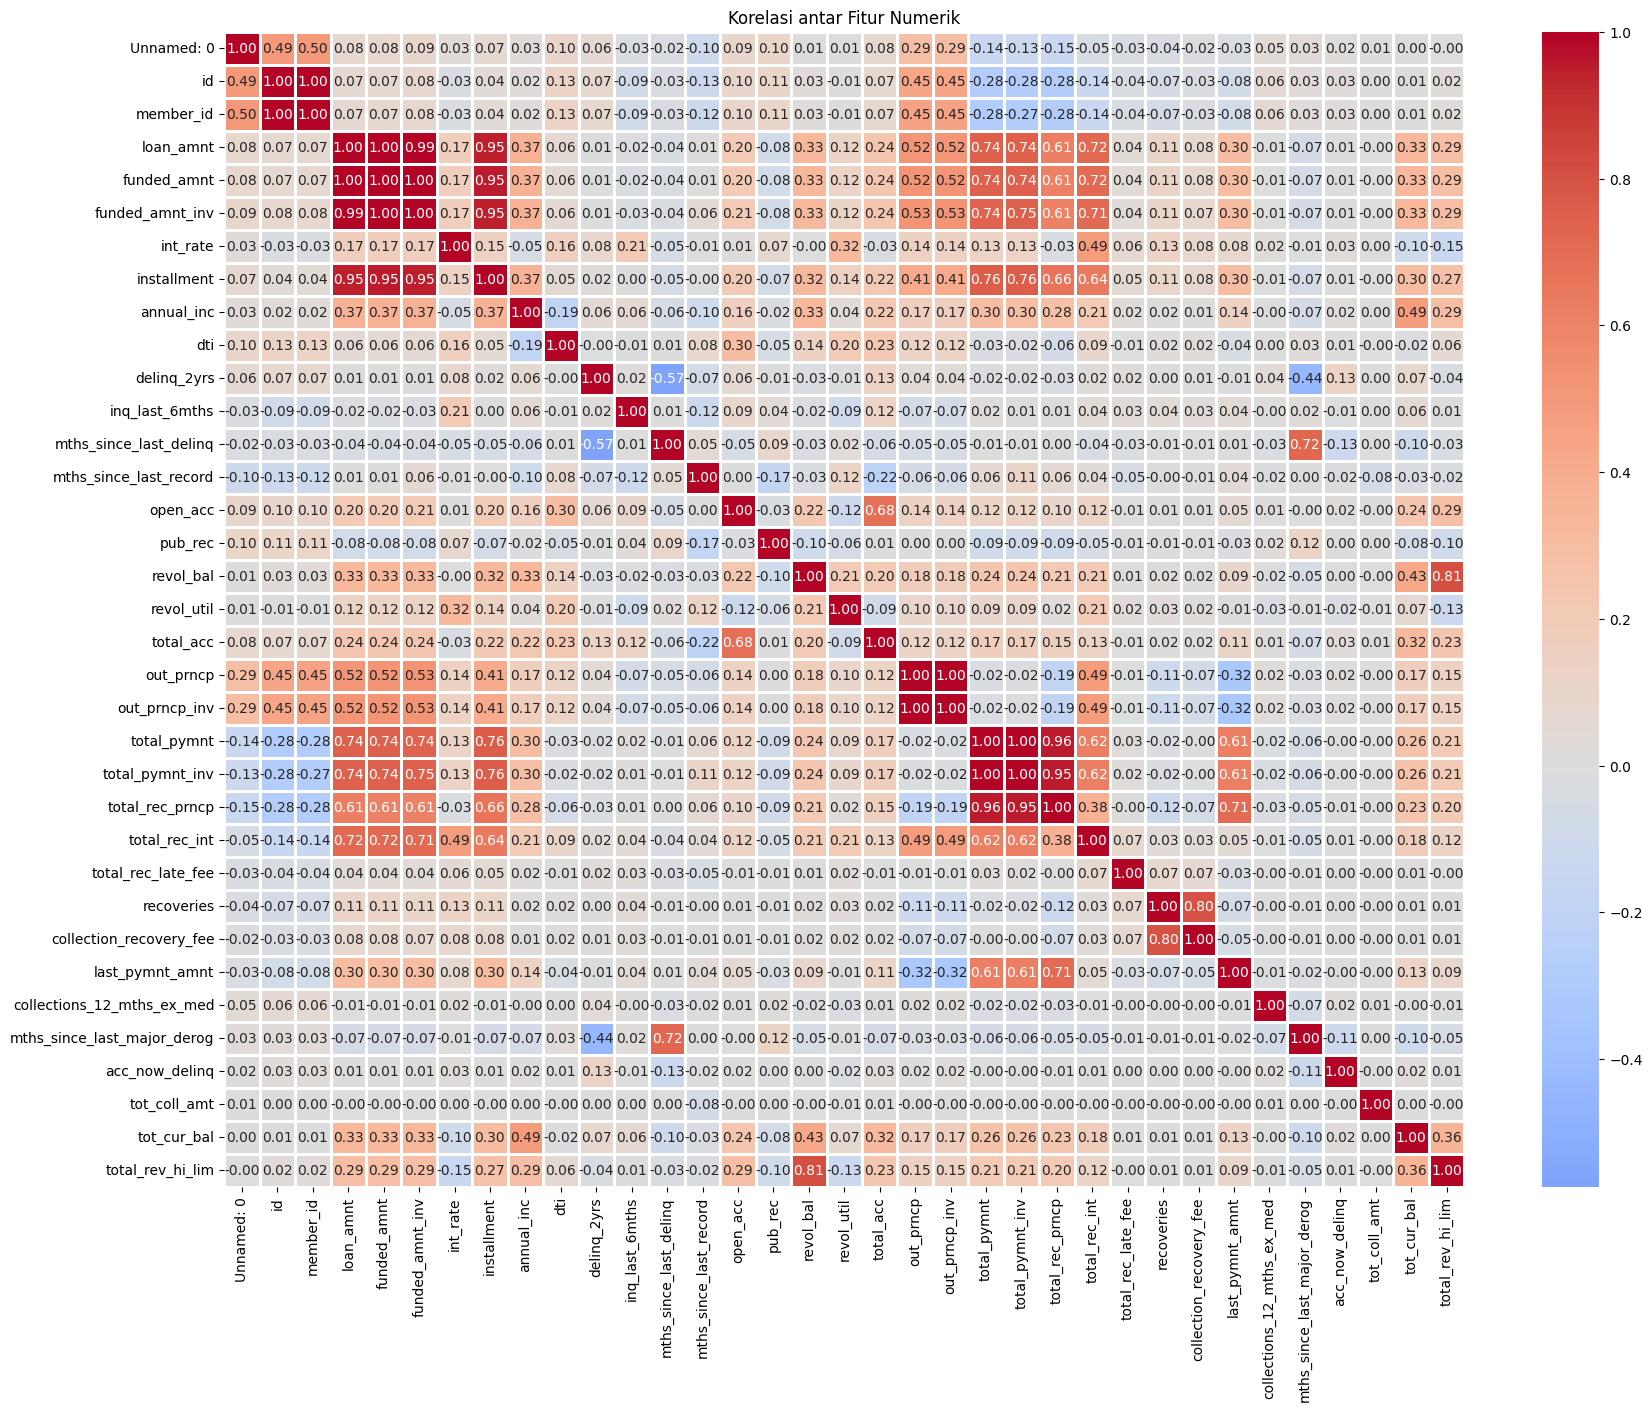

In [ ]:
# ==========================================
# Cek Korelasi Antar Fitur Numerik → membantu melihat fitur yang mungkin redundan.
# ==========================================

plt.figure(figsize=(20,15))
corr_matrix = data[num_columns].corr()
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, annot=True, fmt='.2f', linewidth=1)
plt.title("Korelasi antar Fitur Numerik")
plt.show()

Terdapat beberapa kolom dengan korelasi tinggi, seperti `loan_amnt, funded_amnt, funded_ammnt_inv`. Hubungan linear yang kuat akan menyebabkan hasil analisis jadi bias dan tidak konsisten (multikolinearitas). Maka kolom ini akan dihapus

###Pairplot

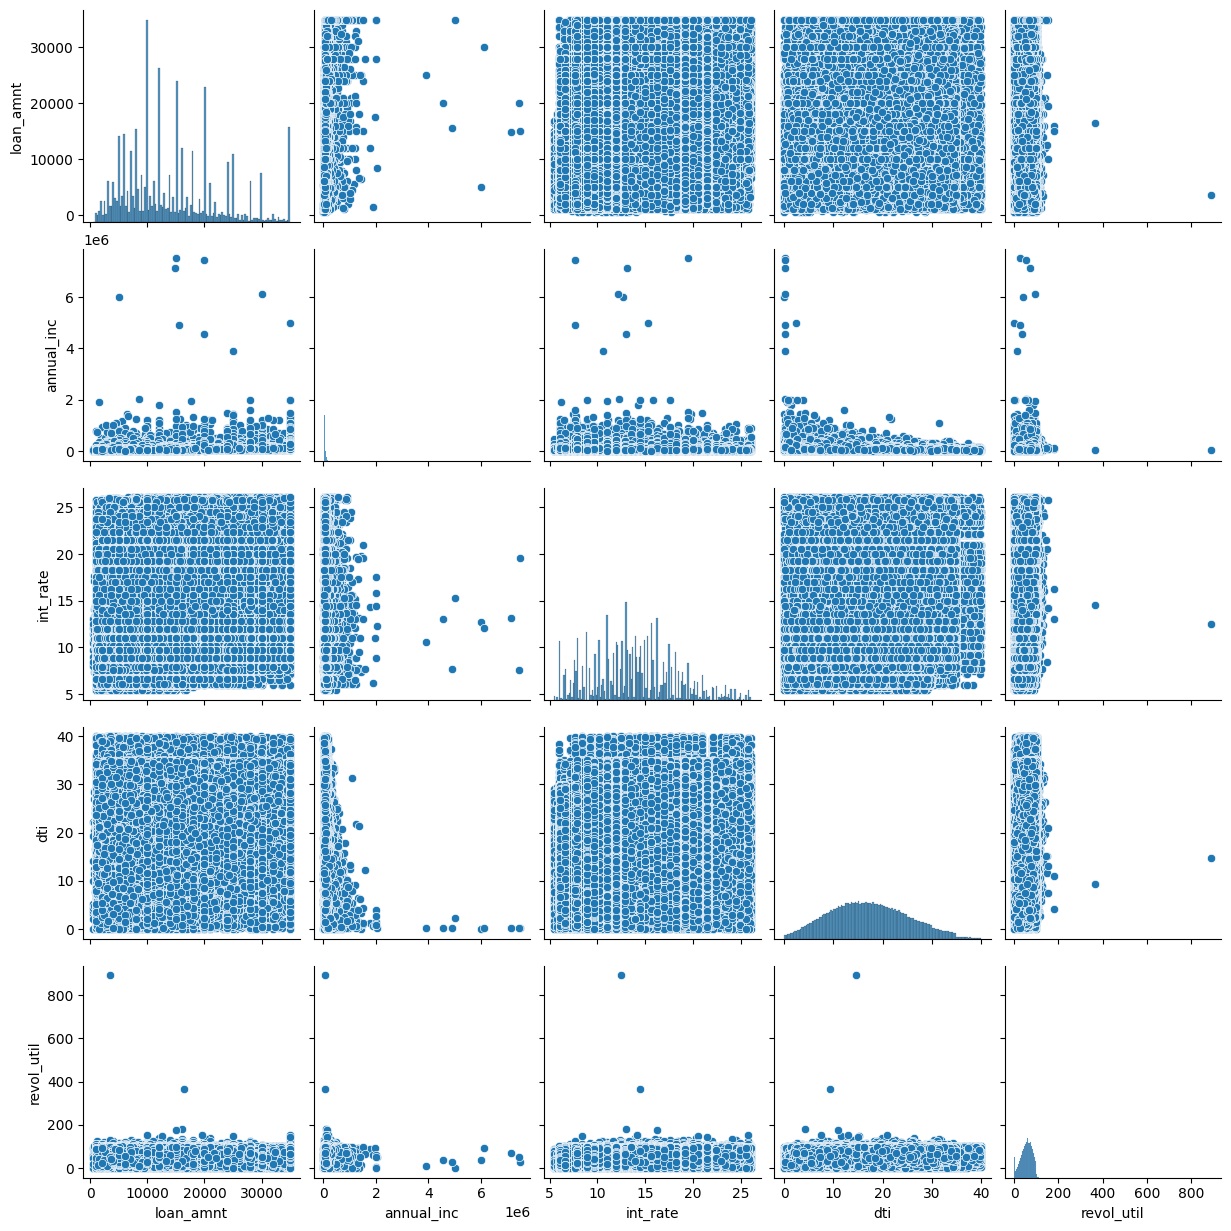

In [ ]:
# Plot fitur
pair_plot = data[['loan_amnt', 'annual_inc', 'int_rate', 'dti', 'revol_util']]
sns.pairplot(pair_plot)

## Data Preparation - Pembersihan data

##### Verifikasi Kualitas Data

1. Pengisian missing values (jika ada) - drop atau isi dgn teknik imputasi

2. Hapus baris dengan data yang salah (jika ada)

3. Koreksi nilai outlier (hapus atau sesuaikan nilainya)

4. Melakukan encoding variabel kategorikal (jika perlu)

5. Scaling atau normalisasi fitur numerik (jika perlu)

6. Membagi data train & test

# Pemeriksaan kualitas integrasi data:

 - Periksa konsistensi data antar kolom

 - Periksa outlier

 - Periksa format data

# Contoh:
 - Jika ada kolom tanggal, pastikan formatnya sama
 - Jika ada kolom numerik, pastikan tidak ada nilai yang tidak wajar
 - Jika ada kolom kategorikal, pastikan tidak ada nilai yang ambigu
 - Pastikan semua kolom memiliki tipe data yang sesuai
 - Pastikan nama kolom tidak mengandung spasi atau karakter khusus
 - Pastikan data sudah dinormalisasi atau distandarisasi jika dibutuhkan

# Contoh:
 - Konversi kolom tanggal ke format datetime
 - Mengganti spasi pada nama kolom dengan underscore
 - Melakukan normalisasi data menggunakan MinMaxScaler

In [30]:
# Hapus kolom tidak perlu
data = data.drop(columns=['Unnamed: 0', 'id', 'member_id'])

In [31]:
# Hapus 'months' pada kolom term dan konvert ke numerik

data['term'] = data['term'].astype(str) # Pastikan tipe data string

data['term'] = data['term'].str.replace(' months', '').astype(int)

print(data['term'].head()) # Tampilkan 5 teratas

0    36
1    60
2    36
3    36
4    60
Name: term, dtype: int64


### Handling Missing Value

1. Summary

In [32]:
# ==========================================
# Missing Value Summary
# ==========================================
"""
- Total missing values
- Kolom dengan missing values
- Kolom semuanya kosong
- Kolom tanpa missing
"""
def cek_missing(data, top_n=20):
  judul("CEK NILAI KOSONG")
  # Cek Semua Data
  miss_values = data.isnull().sum().sort_values(ascending=False)
  miss_total = miss_values.sum()
  miss_col = (miss_values > 0).sum()

  print(f"\nTotal missing values: {miss_total}")
  print(f"\nJumlah kolom dengan missing values: {miss_col}")

  # Tampilkan Data dengan Missing > 0
  print("\nTampilkan Data Missing > 0:")
  miss_filter = miss_values[miss_values > 0]

  if not miss_filter.empty:
    tampilkan = pd.DataFrame({
      "Missing Values": miss_filter,
      "Percentage (%)": (miss_filter/len(data))*100,
      "Data Type": data.dtypes[miss_filter.index]
    })

    display(tampilkan)

  else:
    print("\n Tidak ada missing values")
    return None

cek_missing(data)


===== CEK NILAI KOSONG =====

Total missing values: 9776227

Jumlah kolom dengan missing values: 40

Tampilkan Data Missing > 0:


Missing Values  Percentage (%)       Data Type
open_rv_12m                          466285      100.000000         float64
il_util                              466285      100.000000         float64
mths_since_rcnt_il                   466285      100.000000         float64
total_bal_il                         466285      100.000000         float64
open_il_24m                          466285      100.000000         float64
open_il_12m                          466285      100.000000         float64
open_il_6m                           466285      100.000000         float64
open_acc_6m                          466285      100.000000         float64
dti_joint                            466285      100.000000         float64
open_rv_24m                          466285      100.000000         float64
max_bal_bc                           466285      100.000000         float64
all_util                             466285      100.000000         float64
inq_last_12m                         466285      100.000000         float64
annual_inc_joint                     466285      100.000000         float64
verification_status_joint            466285      100.000000         float64
total_cu_tl                          466285      100.000000         float64
inq_fi                               466285      100.000000         float64
mths_since_last_record               403647       86.566585         float64
mths_since_last_major_derog          367311       78.773926         float64
desc                                 340304       72.981975          object
mths_since_last_delinq               250351       53.690554         float64
next_pymnt_d                         227214       48.728567  datetime64[ns]
tot_coll_amt                          70276       15.071469         float64
tot_cur_bal                           70276       15.071469         float64
total_rev_hi_lim                      70276       15.071469         float64
emp_title                             27588        5.916553          object
emp_length                            21008        4.505399          object
last_pymnt_d                            376        0.080637  datetime64[ns]
revol_util                              340        0.072917         float64
collections_12_mths_ex_med              145        0.031097         float64
last_credit_pull_d                       42        0.009007  datetime64[ns]
inq_last_6mths                           29        0.006219         float64
delinq_2yrs                              29        0.006219         float64
acc_now_delinq                           29        0.006219         float64
pub_rec                                  29        0.006219         float64
total_acc                                29        0.006219         float64
earliest_cr_line                         29        0.006219  datetime64[ns]
open_acc                                 29        0.006219         float64
title                                    21        0.004504          object
annual_inc                                4        0.000858         float64

> Hasil eksplorasi missing value:

Total missing values: 9776227

Jumlah kolom dengan missing values: 40

Jumlah kolom dengan nilai kosong: 17 - akan di drop

2. Empty Column

In [33]:
# Cek Nilai Kosong Suatu Kolom
empty_col = data.columns[data.isnull().all()]
empty_count = len(empty_col)
print(f"\nJumlah semua kolom kosong: {empty_count}")

if empty_count > 0:
  print("\nDaftar kolom kosong:")
  display(empty_col.tolist())


Jumlah semua kolom kosong: 17

Daftar kolom kosong:


['annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m']

In [34]:
  # Hapus 17 Kolom Kosong
  data = data.drop(columns=empty_col)

  # Periksa Kembali Informasi
  print(f"{len(empty_col)} kolom kosong sepenuhnya dihapus: {empty_col.tolist()}")


17 kolom kosong sepenuhnya dihapus: ['annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m']


2. Partial Empty Column

In [35]:
# Cek Kembali Data Setelah Drop
cek_missing(data)


===== CEK NILAI KOSONG =====

Total missing values: 1849382

Jumlah kolom dengan missing values: 23

Tampilkan Data Missing > 0:


Missing Values  Percentage (%)       Data Type
mths_since_last_record               403647       86.566585         float64
mths_since_last_major_derog          367311       78.773926         float64
desc                                 340304       72.981975          object
mths_since_last_delinq               250351       53.690554         float64
next_pymnt_d                         227214       48.728567  datetime64[ns]
total_rev_hi_lim                      70276       15.071469         float64
tot_cur_bal                           70276       15.071469         float64
tot_coll_amt                          70276       15.071469         float64
emp_title                             27588        5.916553          object
emp_length                            21008        4.505399          object
last_pymnt_d                            376        0.080637  datetime64[ns]
revol_util                              340        0.072917         float64
collections_12_mths_ex_med              145        0.031097         float64
last_credit_pull_d                       42        0.009007  datetime64[ns]
earliest_cr_line                         29        0.006219  datetime64[ns]
delinq_2yrs                              29        0.006219         float64
pub_rec                                  29        0.006219         float64
open_acc                                 29        0.006219         float64
inq_last_6mths                           29        0.006219         float64
total_acc                                29        0.006219         float64
acc_now_delinq                           29        0.006219         float64
title                                    21        0.004504          object
annual_inc                                4        0.000858         float64

1. >70% missing
  
  ~ `mths_since_last_record`: 86% tidak ada catatan publik peminjam - isi nilai missing dengan 0 = tidak ada record; drop data kosong, dan sisanya buat biner

  ~ `mths_since_last_major_derog`: kemungkinan peminjam tidak mengalami keterlambatan parah, bisa diubah menjadi biner 0 = tidak pernah, 1 = pernah

  ~ `desc`: subjektif, kurang informatif - lebih baik di drop






In [36]:
filter_cols_mths = data[['mths_since_last_record', 'mths_since_last_major_derog', 'mths_since_last_delinq']]
filter_cols_mths.describe()

mths_since_last_record  mths_since_last_major_derog  \
count            62638.000000                 98974.000000   
mean                74.306012                    42.852547   
std                 30.357653                    21.662591   
min                  0.000000                     0.000000   
25%                 53.000000                    26.000000   
50%                 76.000000                    42.000000   
75%                102.000000                    59.000000   
max                129.000000                   188.000000   

       mths_since_last_delinq  
count           215934.000000  
mean                34.104430  
std                 21.778487  
min                  0.000000  
25%                 16.000000  
50%                 31.000000  
75%                 49.000000  
max                188.000000

Periksa kolom `mths_since_last_record`, `mths_since_last_major_derog`, `mths_since_last_delinq`. Cek kemungkinan berkaitan dengan kolom lain

In [37]:
# Cek mths_since_last_delinq = 0 dimana nilai delinq_2yrs != 0
data.loc[(data['mths_since_last_delinq'].isna()) & (data['delinq_2yrs'] != 0.0), ['mths_since_last_delinq', 'delinq_2yrs']]


mths_since_last_delinq  delinq_2yrs
42449                      NaN          NaN
42450                      NaN          NaN
42459                      NaN          NaN
42472                      NaN          NaN
42480                      NaN          NaN
...                        ...          ...
456945                     NaN          1.0
457114                     NaN          1.0
458750                     NaN          1.0
458796                     NaN          1.0
466189                     NaN          1.0

[525 rows x 2 columns]

Kolom mengandung missing values (NaN) dengan asumsi beberapa orang tidak memiliki riwayat catatan

Terdapat 525 baris kosong, dengan asumsi peminjam tidak pernah tercatat deliquency. Maka dilakukan imputasi dengan mengisi 0 untuk data yang tidak pernah terjadi, dan -1 untuk data yang tidak diketahui


Imputasi

- NaN - fillna(0) -  tidak pernah terjadi

- NaN - fillna(-1) - tidak diketahui/missing info. Ini menandakan bahwa "tidak ada data". Kolom berhubungan dengan variabel lain



In [38]:
data.groupby('delinq_2yrs')['mths_since_last_delinq'].apply(lambda x: x.isna().mean())

delinq_2yrs
0.0     0.652366
1.0     0.005585
2.0     0.003188
3.0     0.005630
4.0     0.008831
5.0     0.015372
6.0     0.030207
7.0     0.043353
8.0     0.045198
9.0     0.072072
10.0    0.030769
11.0    0.024390
12.0    0.052632
13.0    0.040000
14.0    0.125000
15.0    0.142857
16.0    0.000000
17.0    0.000000
18.0    0.000000
19.0    0.000000
21.0    0.000000
22.0    0.000000
24.0    0.000000
29.0    0.000000
Name: mths_since_last_delinq, dtype: float64

In [39]:
# Imputasi dengan 0

# 1. mths_since_last_record
# mths_since_last_record dimana pub_rec = 0
data.loc[(data['mths_since_last_record'].isna()) & (data['pub_rec'] == 0.0), 'mths_since_last_record'] = 0

# 2. mths_since_last_major_derog
# mths_since_last_major_derog dimana pub_rec = 0 dan delinq_2yrs = 0
data.loc[(data['mths_since_last_major_derog'].isna()) & (data['pub_rec'] == 0.0) & (data['delinq_2yrs'] == 0.0), 'mths_since_last_major_derog'] = 0

# 3. mths_since_last_delinq
# mths_since_last_delinq dimana delinq_2yrs = 0
data.loc[(data['mths_since_last_delinq'].isna()) & (data['delinq_2yrs'] == 0.0), 'mths_since_last_delinq'] = 0


In [40]:
# Mengisi nilai missing dengan -1 untuk data yang tidak diketahui
data[['mths_since_last_delinq', 'mths_since_last_major_derog']] = data[['mths_since_last_delinq', 'mths_since_last_major_derog']].fillna(-1)

In [ ]:
# # Drop kolom desc
# if "desc" in data.columns:
#   data.drop(columns=["desc"], inplace=True)

2. 15-50% missing

  ~ mths_since_last_delinq

  ~ next_pymnt_d

  Imputasi: median
  atau isi 0

  Cek lebih lanjut kolom dengan jumlah missing values sama

  - `tot_cur_bal`, `total_rev_hi_lim`, `tot_coll_amt` 15% atau 70276 baris

  - `earliest_cr_line`, `pub_rec`, `open_acc`, `inq_last_6mths`, `delinq_2yrs`, `acc_now_delinq`, `total_acc` 6% atau 29 baris

  Cek missing values apakah di baris yang sama, jika iya maka hapus

In [41]:
# Periksa jika terdiri dari banyak baris
# Ada banyak baris, kemungkinan ada data penting, bisa berkorelasi dengan kolom lain, keep dulu
filter_col_1 = data[['tot_cur_bal', 'total_rev_hi_lim', 'tot_coll_amt']]

# Cek baris kosong
empty_col_1 = filter_col_1[filter_col_1.isnull().all(axis=1)]
display(empty_col_1)

print(f"Total Baris Kosong: {(len(empty_col_1))}")

tot_cur_bal  total_rev_hi_lim  tot_coll_amt
0               NaN               NaN           NaN
1               NaN               NaN           NaN
2               NaN               NaN           NaN
3               NaN               NaN           NaN
4               NaN               NaN           NaN
...             ...               ...           ...
230652          NaN               NaN           NaN
230653          NaN               NaN           NaN
230654          NaN               NaN           NaN
230655          NaN               NaN           NaN
230656          NaN               NaN           NaN

[70276 rows x 3 columns]

Total Baris Kosong: 70276


In [42]:
# Kolom dengan total missing values sama
filter_col_2 = data[['earliest_cr_line', 'pub_rec', 'open_acc', 'inq_last_6mths', 'delinq_2yrs', 'acc_now_delinq', 'total_acc']]

# Cek missing values
empty_col_2 = filter_col_2[filter_col_2.isnull().all(axis=1)]
display(empty_col_2)

print(f"Total Baris: {len(empty_col_2)}")

earliest_cr_line  pub_rec  open_acc  inq_last_6mths  delinq_2yrs  \
42449              NaT      NaN       NaN             NaN          NaN   
42450              NaT      NaN       NaN             NaN          NaN   
42459              NaT      NaN       NaN             NaN          NaN   
42472              NaT      NaN       NaN             NaN          NaN   
42480              NaT      NaN       NaN             NaN          NaN   
42483              NaT      NaN       NaN             NaN          NaN   
42494              NaT      NaN       NaN             NaN          NaN   
42509              NaT      NaN       NaN             NaN          NaN   
42514              NaT      NaN       NaN             NaN          NaN   
42515              NaT      NaN       NaN             NaN          NaN   
42516              NaT      NaN       NaN             NaN          NaN   
42517              NaT      NaN       NaN             NaN          NaN   
42518              NaT      NaN       NaN             NaN          NaN   
42519              NaT      NaN       NaN             NaN          NaN   
42520              NaT      NaN       NaN             NaN          NaN   
42521              NaT      NaN       NaN             NaN          NaN   
42522              NaT      NaN       NaN             NaN          NaN   
42523              NaT      NaN       NaN             NaN          NaN   
42524              NaT      NaN       NaN             NaN          NaN   
42525              NaT      NaN       NaN             NaN          NaN   
42526              NaT      NaN       NaN             NaN          NaN   
42527              NaT      NaN       NaN             NaN          NaN   
42528              NaT      NaN       NaN             NaN          NaN   
42529              NaT      NaN       NaN             NaN          NaN   
42530              NaT      NaN       NaN             NaN          NaN   
42531              NaT      NaN       NaN             NaN          NaN   
42532              NaT      NaN       NaN             NaN          NaN   
42533              NaT      NaN       NaN             NaN          NaN   
42534              NaT      NaN       NaN             NaN          NaN   

       acc_now_delinq  total_acc  
42449             NaN        NaN  
42450             NaN        NaN  
42459             NaN        NaN  
42472             NaN        NaN  
42480             NaN        NaN  
42483             NaN        NaN  
42494             NaN        NaN  
42509             NaN        NaN  
42514             NaN        NaN  
42515             NaN        NaN  
42516             NaN        NaN  
42517             NaN        NaN  
42518             NaN        NaN  
42519             NaN        NaN  
42520             NaN        NaN  
42521             NaN        NaN  
42522             NaN        NaN  
42523             NaN        NaN  
42524             NaN        NaN  
42525             NaN        NaN  
42526             NaN        NaN  
42527             NaN        NaN  
42528             NaN        NaN  
42529             NaN        NaN  
42530             NaN        NaN  
42531             NaN        NaN  
42532             NaN        NaN  
42533             NaN        NaN  
42534             NaN        NaN

Total Baris: 29


In [43]:
def drop_all_missing(data, cols):
  judul("HAPUS BARIS KOSONG")
  before = len(data)

  # Baris dengan semua kolom NaN
  empty_col = data[cols].isnull().all(axis=1)
  empty_count = empty_col.sum()

  print(f"Total Baris Kosong: {empty_count}")

  # Drop Baris Kosong
  data = data.dropna(subset=cols, how="all")

  after = len(data)
  print(f"\nBaris sebelum drop: {before}")
  print(f"Baris sesudah drop: {after}")
  print(f" {before-after} baris dihapus")

  return data

In [44]:
# drop_col_1 = ['tot_cur_bal', 'total_rev_hi_lim', 'tot_coll_amt']
# data = drop_all_missing(data, drop_col_1)

drop_col_2 = ['earliest_cr_line', 'pub_rec', 'open_acc', 'inq_last_6mths', 'delinq_2yrs', 'acc_now_delinq', 'total_acc']
data = drop_all_missing(data, drop_col_2)


===== HAPUS BARIS KOSONG =====
Total Baris Kosong: 29

Baris sebelum drop: 466285
Baris sesudah drop: 466256
 29 baris dihapus


In [45]:
# Cek Kembali Data Setelah Drop
cek_missing(data)


===== CEK NILAI KOSONG =====

Total missing values: 827707

Jumlah kolom dengan missing values: 12

Tampilkan Data Missing > 0:


Missing Values  Percentage (%)       Data Type
desc                                340303       72.986299          object
next_pymnt_d                        227214       48.731598  datetime64[ns]
tot_cur_bal                          70247       15.066187         float64
total_rev_hi_lim                     70247       15.066187         float64
tot_coll_amt                         70247       15.066187         float64
emp_title                            27576        5.914347          object
emp_length                           21008        4.505679          object
last_pymnt_d                           376        0.080642  datetime64[ns]
revol_util                             311        0.066702         float64
collections_12_mths_ex_med             116        0.024879         float64
last_credit_pull_d                      41        0.008793  datetime64[ns]
title                                   21        0.004504          object

3. <10% missing

  ~ emp_title: imputasi mode atau "Unknown"
  
  ~ emp_length: imputasi median

4. <1% missing lainnya - drop

Kolom tanggal
next_pymnt_d,
last_pymnt_d,
last_credit_pull_d,
earliest_cr_line
Jika hilang isi "Missing" atau biarkan NaT

In [46]:
# Cek baris dengan null di last_pymnt_d dengan informasi kolom lainnya
data.loc[(data['last_pymnt_d'].isnull()), ['last_pymnt_d', 'loan_status', 'last_pymnt_amnt', 'total_pymnt']]

last_pymnt_d  loan_status  last_pymnt_amnt  total_pymnt
26              NaT  Charged Off              0.0         0.00
2731            NaT  Charged Off              0.0         0.00
3625            NaT  Charged Off              0.0       366.75
3998            NaT  Charged Off              0.0         0.00
4220            NaT  Charged Off              0.0      1800.00
...             ...          ...              ...          ...
455499          NaT  Charged Off              0.0       957.97
458391          NaT  Charged Off              0.0      1144.13
459366          NaT  Charged Off              0.0         0.00
464853          NaT  Charged Off              0.0      1991.37
465510          NaT  Charged Off              0.0      4278.15

[376 rows x 4 columns]

In [47]:
# Cek nilai unik dari loan_status dimana last_pymnt_d null
data.loc[data['last_pymnt_d'].isnull(), 'loan_status'].unique()


array(['Charged Off',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [48]:
print(data['next_pymnt_d'].unique())

<DatetimeArray>
[                'NaT', '2016-02-01 00:00:00', '2016-01-01 00:00:00',
 '2013-09-01 00:00:00', '2014-02-01 00:00:00', '2014-05-01 00:00:00',
 '2013-06-01 00:00:00', '2012-03-01 00:00:00', '2012-04-01 00:00:00',
 '2013-05-01 00:00:00',
 ...
 '2008-08-01 00:00:00', '2008-06-01 00:00:00', '2008-07-01 00:00:00',
 '2008-04-01 00:00:00', '2008-05-01 00:00:00', '2008-02-01 00:00:00',
 '2008-01-01 00:00:00', '2008-03-01 00:00:00', '2007-12-01 00:00:00',
 '2016-03-01 00:00:00']
Length: 101, dtype: datetime64[ns]


In [49]:
# Cek baris null di last_credit_pull_d
data.loc[(data['last_credit_pull_d'].isnull()), ['last_credit_pull_d', 'issue_d', 'last_pymnt_d', 'loan_status']]

last_credit_pull_d    issue_d last_pymnt_d  \
26094                 NaT 2010-09-01   2012-06-01   
39545                 NaT 2007-12-01   2010-08-01   
42482                 NaT 2007-07-01   2008-09-01   
65583                 NaT 2013-11-01   2015-09-01   
67604                 NaT 2013-11-01   2014-08-01   
67775                 NaT 2013-11-01   2015-02-01   
68251                 NaT 2013-11-01   2015-09-01   
70447                 NaT 2013-11-01   2016-01-01   
70508                 NaT 2013-11-01   2016-01-01   
70530                 NaT 2013-11-01   2015-12-01   
71322                 NaT 2013-11-01   2016-01-01   
71468                 NaT 2013-11-01   2014-12-01   
80405                 NaT 2013-10-01   2016-01-01   
80946                 NaT 2013-10-01   2015-03-01   
246515                NaT 2014-11-01   2015-12-01   
256927                NaT 2014-11-01   2015-08-01   
257029                NaT 2014-11-01   2015-07-01   
261290                NaT 2014-11-01   2016-01-01   
262988                NaT 2014-11-01   2016-01-01   
268759                NaT 2014-11-01   2016-01-01   
284353                NaT 2014-10-01   2016-01-01   
285996                NaT 2014-10-01   2015-05-01   
291037                NaT 2014-10-01   2016-01-01   
292355                NaT 2014-10-01   2016-01-01   
295829                NaT 2014-10-01   2016-01-01   
296526                NaT 2014-10-01   2016-01-01   
298669                NaT 2014-10-01   2016-01-01   
299137                NaT 2014-10-01   2016-01-01   
300940                NaT 2014-10-01   2016-01-01   
305120                NaT 2014-09-01   2015-04-01   
353477                NaT 2014-07-01   2016-01-01   
359337                NaT 2014-07-01   2015-07-01   
372977                NaT 2014-06-01   2016-01-01   
374015                NaT 2014-06-01   2016-01-01   
374936                NaT 2014-06-01   2015-06-01   
404493                NaT 2014-04-01   2016-01-01   
411479                NaT 2014-04-01   2015-04-01   
429518                NaT 2014-03-01   2015-07-01   
432743                NaT 2014-03-01   2015-04-01   
444928                NaT 2014-02-01   2015-03-01   
460654                NaT 2014-01-01   2016-01-01   

                                              loan_status  
26094                                         Charged Off  
39545                                          Fully Paid  
42482   Does not meet the credit policy. Status:Fully ...  
65583                                          Fully Paid  
67604                                          Fully Paid  
67775                                         Charged Off  
68251                                          Fully Paid  
70447                                             Current  
70508                                             Current  
70530                                          Fully Paid  
71322                                          Fully Paid  
71468                                          Fully Paid  
80405                                             Current  
80946                                          Fully Paid  
246515                                            Current  
256927                                         Fully Paid  
257029                                        Charged Off  
261290                                            Current  
262988                                            Current  
268759                                            Current  
284353                                            Current  
285996                                         Fully Paid  
291037                                            Current  
292355                                            Current  
295829                                            Current  
296526                                            Current  
298669                                            Current  
299137                                            Current  
300940                                  

In [50]:
# Cek baris null di last_pymnt_d
data.loc[(data['last_pymnt_d'].isnull()), ['last_pymnt_d', 'loan_status', 'last_pymnt_amnt', 'total_pymnt']]

last_pymnt_d  loan_status  last_pymnt_amnt  total_pymnt
26              NaT  Charged Off              0.0         0.00
2731            NaT  Charged Off              0.0         0.00
3625            NaT  Charged Off              0.0       366.75
3998            NaT  Charged Off              0.0         0.00
4220            NaT  Charged Off              0.0      1800.00
...             ...          ...              ...          ...
455499          NaT  Charged Off              0.0       957.97
458391          NaT  Charged Off              0.0      1144.13
459366          NaT  Charged Off              0.0         0.00
464853          NaT  Charged Off              0.0      1991.37
465510          NaT  Charged Off              0.0      4278.15

[376 rows x 4 columns]

In [51]:
# Cek nilai unik dari loan_status dimana last_credit_pull_d null
data.loc[data['last_credit_pull_d'].isnull(), 'loan_status'].value_counts()


loan_status
Current                                               19
Fully Paid                                            15
Charged Off                                            6
Does not meet the credit policy. Status:Fully Paid     1
Name: count, dtype: int64

In [52]:
# Cek jumlah data kosong
data.loc[(data['next_pymnt_d'].isnull()), 'loan_status'].value_counts()

loan_status
Fully Paid     184739
Charged Off     42475
Name: count, dtype: int64

Kolom `next_pymnt_d` berisi peminjam dengan loan_status "Fully Paid" dan "Charged Off"

Imputasi nilai null pada kolom `title, emp_title, dan emp_length`

Lakukan imputasi pada kolom `next_pymnt_d` dengan nilai 'Missing' atau 'Closed'

- "Missing" sebagai penanda data tidak ada (belum tentu kosong)

- "Closed" pada `next_pymnt_d` sebagai penanda pinjaman lunas

- Kolom lain yang kosong dianggap tidak ada data, diimputasi dengan "Missing"

In [53]:
# Imputasi dengan mengisi "Missing"
def replace_val(data,col_list):
  for col in col_list:
    # Konversi tipe data ke string
    if data[col].dtype == 'datetime64[ns]':
      data[col] = data[col].astype(str).replace('NaT', 'Missing')

    # Isi NaN
    if col == 'next_pymnt_d':
      data[col] = data[col].replace('Missing', 'Closed')
    else:
      data[col] = data[col].fillna('Missing')
  return data

# col_impute = ['title', 'desc', 'emp_title', 'emp_length', 'last_pymnt_d', 'last_credit_pull_d', 'next_pymnt_d']
col_impute = ['title', 'desc', 'emp_title', 'emp_length', 'last_pymnt_d', 'last_credit_pull_d', 'next_pymnt_d']
replace_val(data, col_impute)


loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
0            5000         5000           4975.0    36     10.65       162.87   
1            2500         2500           2500.0    60     15.27        59.83   
2            2400         2400           2400.0    36     15.96        84.33   
3           10000        10000          10000.0    36     13.49       339.31   
4            3000         3000           3000.0    60     12.69        67.79   
...           ...          ...              ...   ...       ...          ...   
466280      18400        18400          18400.0    60     14.47       432.64   
466281      22000        22000          22000.0    60     19.97       582.50   
466282      20700        20700          20700.0    60     16.99       514.34   
466283       2000         2000           2000.0    36      7.90        62.59   
466284      10000        10000           9975.0    36     19.20       367.58   

       grade sub_grade                              emp_title emp_length  ...  \
0          B        B2                                Missing  10+ years  ...   
1          C        C4                                  Ryder   < 1 year  ...   
2          C        C5                                Missing  10+ years  ...   
3          C        C1                    AIR RESOURCES BOARD  10+ years  ...   
4          B        B5               University Medical Group     1 year  ...   
...      ...       ...                                    ...        ...  ...   
466280     C        C2                     Financial Advisor     4 years  ...   
466281     D        D5  Chief of Interpretation (Park Ranger)  10+ years  ...   
466282     D        D1                                 patrol    7 years  ...   
466283     A        A4                   Server Engineer Lead    3 years  ...   
466284     D        D3                                Missing  10+ years  ...   

       next_pymnt_d  last_credit_pull_d collections_12_mths_ex_med  \
0            Closed          2016-01-01                        0.0   
1            Closed          2013-09-01                        0.0   
2            Closed          2016-01-01                        0.0   
3            Closed          2015-01-01                        0.0   
4        2016-02-01          2016-01-01                        0.0   
...             ...                 ...                        ...   
466280   2016-02-01          2016-01-01                        0.0   
466281       Closed          2016-01-01                        0.0   
466282   2016-02-01          2015-12-01                        0.0   
466283       Closed          2015-04-01                        0.0   
466284   2016-02-01          2016-01-01                        0.0   

       mths_since_last_major_derog policy_code application_type  \
0                              0.0           1       INDIVIDUAL   
1                              0.0           1       INDIVIDUAL   
2                              0.0           1       INDIVIDUAL   
3                              0.0           1       INDIVIDUAL   
4                              0.0           1       INDIVIDUAL   
...                            ...         ...              ...   
466280                         0.0           1       INDIVIDUAL   
466281                        -1.0           1       INDIVIDUAL   
466282                         0.0           1       INDIVIDUAL   
466283                        -1.0           1       INDIVIDUAL   
466284                        -1.0           1       INDIVIDUAL   

       acc_now_delinq tot_coll_amt tot_cur_bal total_rev_hi_lim  
0                 0.0          NaN         NaN              NaN  
1                 0.0          NaN         NaN              NaN  
2                 0.0          NaN         NaN              NaN  
3                 0.0          NaN         NaN              NaN  
4                 0.0          NaN         NaN              NaN  
...               ...          .

In [54]:
# Cek Kembali Data
cek_missing(data)


===== CEK NILAI KOSONG =====

Total missing values: 211168

Jumlah kolom dengan missing values: 5

Tampilkan Data Missing > 0:


Missing Values  Percentage (%) Data Type
total_rev_hi_lim                     70247       15.066187   float64
tot_cur_bal                          70247       15.066187   float64
tot_coll_amt                         70247       15.066187   float64
revol_util                             311        0.066702   float64
collections_12_mths_ex_med             116        0.024879   float64

In [55]:
# Cek kemungkinan korelasi
data[['tot_coll_amt', 'collections_12_mths_ex_med', 'recoveries', 'collection_recovery_fee']].corr()


tot_coll_amt  collections_12_mths_ex_med  \
tot_coll_amt                    1.000000                    0.006721   
collections_12_mths_ex_med      0.006721                    1.000000   
recoveries                     -0.000625                   -0.001023   
collection_recovery_fee        -0.000309                   -0.000369   

                            recoveries  collection_recovery_fee  
tot_coll_amt                 -0.000625                -0.000309  
collections_12_mths_ex_med   -0.001023                -0.000369  
recoveries                    1.000000                 0.800702  
collection_recovery_fee       0.800702                 1.000000

In [56]:
data[['tot_coll_amt', 'collections_12_mths_ex_med', 'recoveries', 'collection_recovery_fee']].describe()

tot_coll_amt  collections_12_mths_ex_med     recoveries  \
count  3.960090e+05               466140.000000  466256.000000   
mean   1.919135e+02                    0.009085      85.337081   
std    1.463021e+04                    0.108648     552.186700   
min    0.000000e+00                    0.000000       0.000000   
25%    0.000000e+00                    0.000000       0.000000   
50%    0.000000e+00                    0.000000       0.000000   
75%    0.000000e+00                    0.000000       0.000000   
max    9.152545e+06                   20.000000   33520.270000   

       collection_recovery_fee  
count            466256.000000  
mean                  8.957759  
std                  85.456480  
min                   0.000000  
25%                   0.000000  
50%                   0.000000  
75%                   0.000000  
max                7002.190000

In [57]:
# Lakukan imputasi dengan 0
data['tot_coll_amt'] = data['tot_coll_amt'].fillna(0)

In [58]:
# Cek korelasi di tot_cur_bal
data[['tot_cur_bal', 'total_pymnt', 'loan_amnt', 'revol_bal', 'out_prncp', 'installment', 'total_rec_int', 'total_rec_prncp', 'open_acc', 'total_acc']].corr()

tot_cur_bal  total_pymnt  loan_amnt  revol_bal  out_prncp  \
tot_cur_bal         1.000000     0.257000   0.332686   0.426826   0.169798   
total_pymnt         0.257000     1.000000   0.743825   0.242154  -0.022111   
loan_amnt           0.332686     0.743825   1.000000   0.331385   0.518680   
revol_bal           0.426826     0.242154   0.331385   1.000000   0.181273   
out_prncp           0.169798    -0.022111   0.518680   0.181273   1.000000   
installment         0.300639     0.764346   0.949660   0.320200   0.408811   
total_rec_int       0.179018     0.624406   0.715861   0.206949   0.488088   
total_rec_prncp     0.234614     0.956657   0.612757   0.209894  -0.189972   
open_acc            0.243536     0.120197   0.204182   0.222901   0.144556   
total_acc           0.317500     0.168673   0.235262   0.198627   0.123398   

                 installment  total_rec_int  total_rec_prncp  open_acc  \
tot_cur_bal         0.300639       0.179018         0.234614  0.243536   
total_pymnt         0.764346       0.624406         0.956657  0.120197   
loan_amnt           0.949660       0.715861         0.612757  0.204182   
revol_bal           0.320200       0.206949         0.209894  0.222901   
out_prncp           0.408811       0.488088        -0.189972  0.144556   
installment         1.000000       0.641927         0.663383  0.196839   
total_rec_int       0.641927       1.000000         0.378279  0.121791   
total_rec_prncp     0.663383       0.378279         1.000000  0.097219   
open_acc            0.196839       0.121791         0.097219  1.000000   
total_acc           0.215906       0.126845         0.152213  0.682114   

                 total_acc  
tot_cur_bal       0.317500  
total_pymnt       0.168673  
loan_amnt         0.235262  
revol_bal         0.198627  
out_prncp         0.123398  
installment       0.215906  
total_rec_int     0.126845  
total_rec_prncp   0.152213  
open_acc          0.682114  
total_acc         1.000000

In [59]:
# Lihat Statistik tot_cur_bal
cek = ['tot_cur_bal', 'total_pymnt', 'loan_amnt', 'revol_bal', 'out_prncp', 'installment', 'total_rec_int', 'total_rec_prncp', 'open_acc', 'total_acc']
cek_stat = data[cek].describe()
display(cek_stat)

tot_cur_bal    total_pymnt      loan_amnt     revol_bal  \
count  3.960090e+05  466256.000000  466256.000000  4.662560e+05   
mean   1.388017e+05   11541.137432   14317.925292  1.623121e+04   
std    1.521147e+05    8265.661898    8286.339281  2.067649e+04   
min    0.000000e+00       0.000000     500.000000  0.000000e+00   
25%    2.861800e+04    5552.615000    8000.000000  6.414000e+03   
50%    8.153900e+04    9419.880000   12000.000000  1.176500e+04   
75%    2.089530e+05   15308.735000   20000.000000  2.033300e+04   
max    8.000078e+06   57777.579870   35000.000000  2.568995e+06   

           out_prncp    installment  total_rec_int  total_rec_prncp  \
count  466256.000000  466256.000000  466256.000000    466256.000000   
mean     4410.336638     432.080469    2588.809240      8866.341344   
std      6355.181225     243.480184    2483.829425      7031.761398   
min         0.000000      15.670000       0.000000         0.000000   
25%         0.000000     256.760000     957.470000      3708.920000   
50%       443.190000     379.915000    1819.015000      6817.890000   
75%      7341.995000     566.620000    3304.652500     12000.000000   
max     32160.380000    1409.990000   24205.620000     35000.030000   

            open_acc      total_acc  
count  466256.000000  466256.000000  
mean       11.187069      25.064430  
std         4.987526      11.600141  
min         0.000000       1.000000  
25%         8.000000      17.000000  
50%        10.000000      23.000000  
75%        14.000000      32.000000  
max        84.000000     156.000000

Imputasi dengan median

In [60]:
impute_cur_bal = data['tot_cur_bal'].median()
data['tot_cur_bal'] = data['tot_cur_bal'].fillna(impute_cur_bal)


In [61]:
# Cek baris null pada total_rev_hi_lim
data.loc[data['total_rev_hi_lim'].notna(), ['total_rev_hi_lim', 'revol_bal', 'revol_util']]

total_rev_hi_lim  revol_bal  revol_util
42535            59900.0      36638        61.2
42536            15100.0       7967        52.8
42537            61100.0      13168        21.6
42538             8100.0       5572        68.8
42539            15400.0      11431        74.2
...                  ...        ...         ...
466280           29900.0      23208        77.6
466281           39400.0      18238        46.3
466282           13100.0       6688        51.1
466283           53100.0      11404        21.5
466284           16000.0      11325        70.8

[396009 rows x 3 columns]

In [62]:
# Cek Korelasi
data[['total_rev_hi_lim', 'revol_bal', 'revol_util']].corr()

total_rev_hi_lim  revol_bal  revol_util
total_rev_hi_lim          1.000000   0.809930   -0.125469
revol_bal                 0.809930   1.000000    0.206497
revol_util               -0.125469   0.206497    1.000000

Korelasi `total_rev_hi_lim` dengan `revol_bal` kuat sehingga dilakukan imputasi dengan median

In [63]:
# Lihat Rasio Penggunaan
data['rev_lim_bal_ratio'] = data['total_rev_hi_lim'] / data['revol_bal']

# Ambil median semua data (median lebih robust terhadap outlier)
median_rat = data['rev_lim_bal_ratio'].median()
print(f'Rasio median dari total revolving credit limit terhadap revolving balance: {median_rat}')

# Impute total_rev_hi_lim
data.loc[data['total_rev_hi_lim'].isnull(), 'total_rev_hi_lim'] = data['revol_bal'] * median_rat

data = data.drop('rev_lim_bal_ratio', axis=1)

Rasio median dari total revolving credit limit terhadap revolving balance: 1.716936098451458


In [64]:
# Cek kemungkinan nilai null di revol_util dengan nilai revol_bal = 0
data.loc[(data['revol_util'].isna()) & (data['revol_bal'] == 0), ['revol_util', 'revol_bal', 'total_rev_hi_lim']]


revol_util  revol_bal  total_rev_hi_lim
3577           NaN          0               0.0
4730           NaN          0               0.0
4960           NaN          0               0.0
11315          NaN          0               0.0
12076          NaN          0               0.0
...            ...        ...               ...
449512         NaN          0               0.0
451515         NaN          0               0.0
459356         NaN          0               0.0
464273         NaN          0               0.0
464774         NaN          0               0.0

[245 rows x 3 columns]

In [65]:
# Cek korelasi
data[['revol_util', 'revol_bal', 'dti', 'int_rate', 'total_rec_int']].corr()

revol_util  revol_bal       dti  int_rate  total_rec_int
revol_util       1.000000   0.206497  0.200412  0.323365       0.209685
revol_bal        0.206497   1.000000  0.143332 -0.004639       0.206949
dti              0.200412   0.143332  1.000000  0.159586       0.089526
int_rate         0.323365  -0.004639  0.159586  1.000000       0.485129
total_rec_int    0.209685   0.206949  0.089526  0.485129       1.000000

In [66]:
# Ratio
rev_util = (data['revol_bal'] / data['total_rev_hi_lim']) * 100

# Imputasi jika revol_bal & total_rev_hi_lim > 0
data.loc[data['revol_util'].isnull(), 'revol_util'] = rev_util

# Imputasi 0 untuk nilai kosong
data['revol_util'] = data['revol_util'].fillna(0)

In [67]:
# Hapus kolom tidak perlu
data = data.dropna(subset='collections_12_mths_ex_med')

In [68]:
# Cek Kembali Data
cek_missing(data)


===== CEK NILAI KOSONG =====

Total missing values: 0

Jumlah kolom dengan missing values: 0

Tampilkan Data Missing > 0:

 Tidak ada missing values


##Handling Duplicate Data

In [69]:
# ==========================================
# Duplicate Summary
# ==========================================
def cek_duplikat(data, subset=None):
  judul("CEK NILAI DUPLIKAT")

  print("\nJumlah baris duplikat:", data.duplicated().sum())

cek_duplikat(data)


===== CEK NILAI DUPLIKAT =====

Jumlah baris duplikat: 0


## Handling Outlier

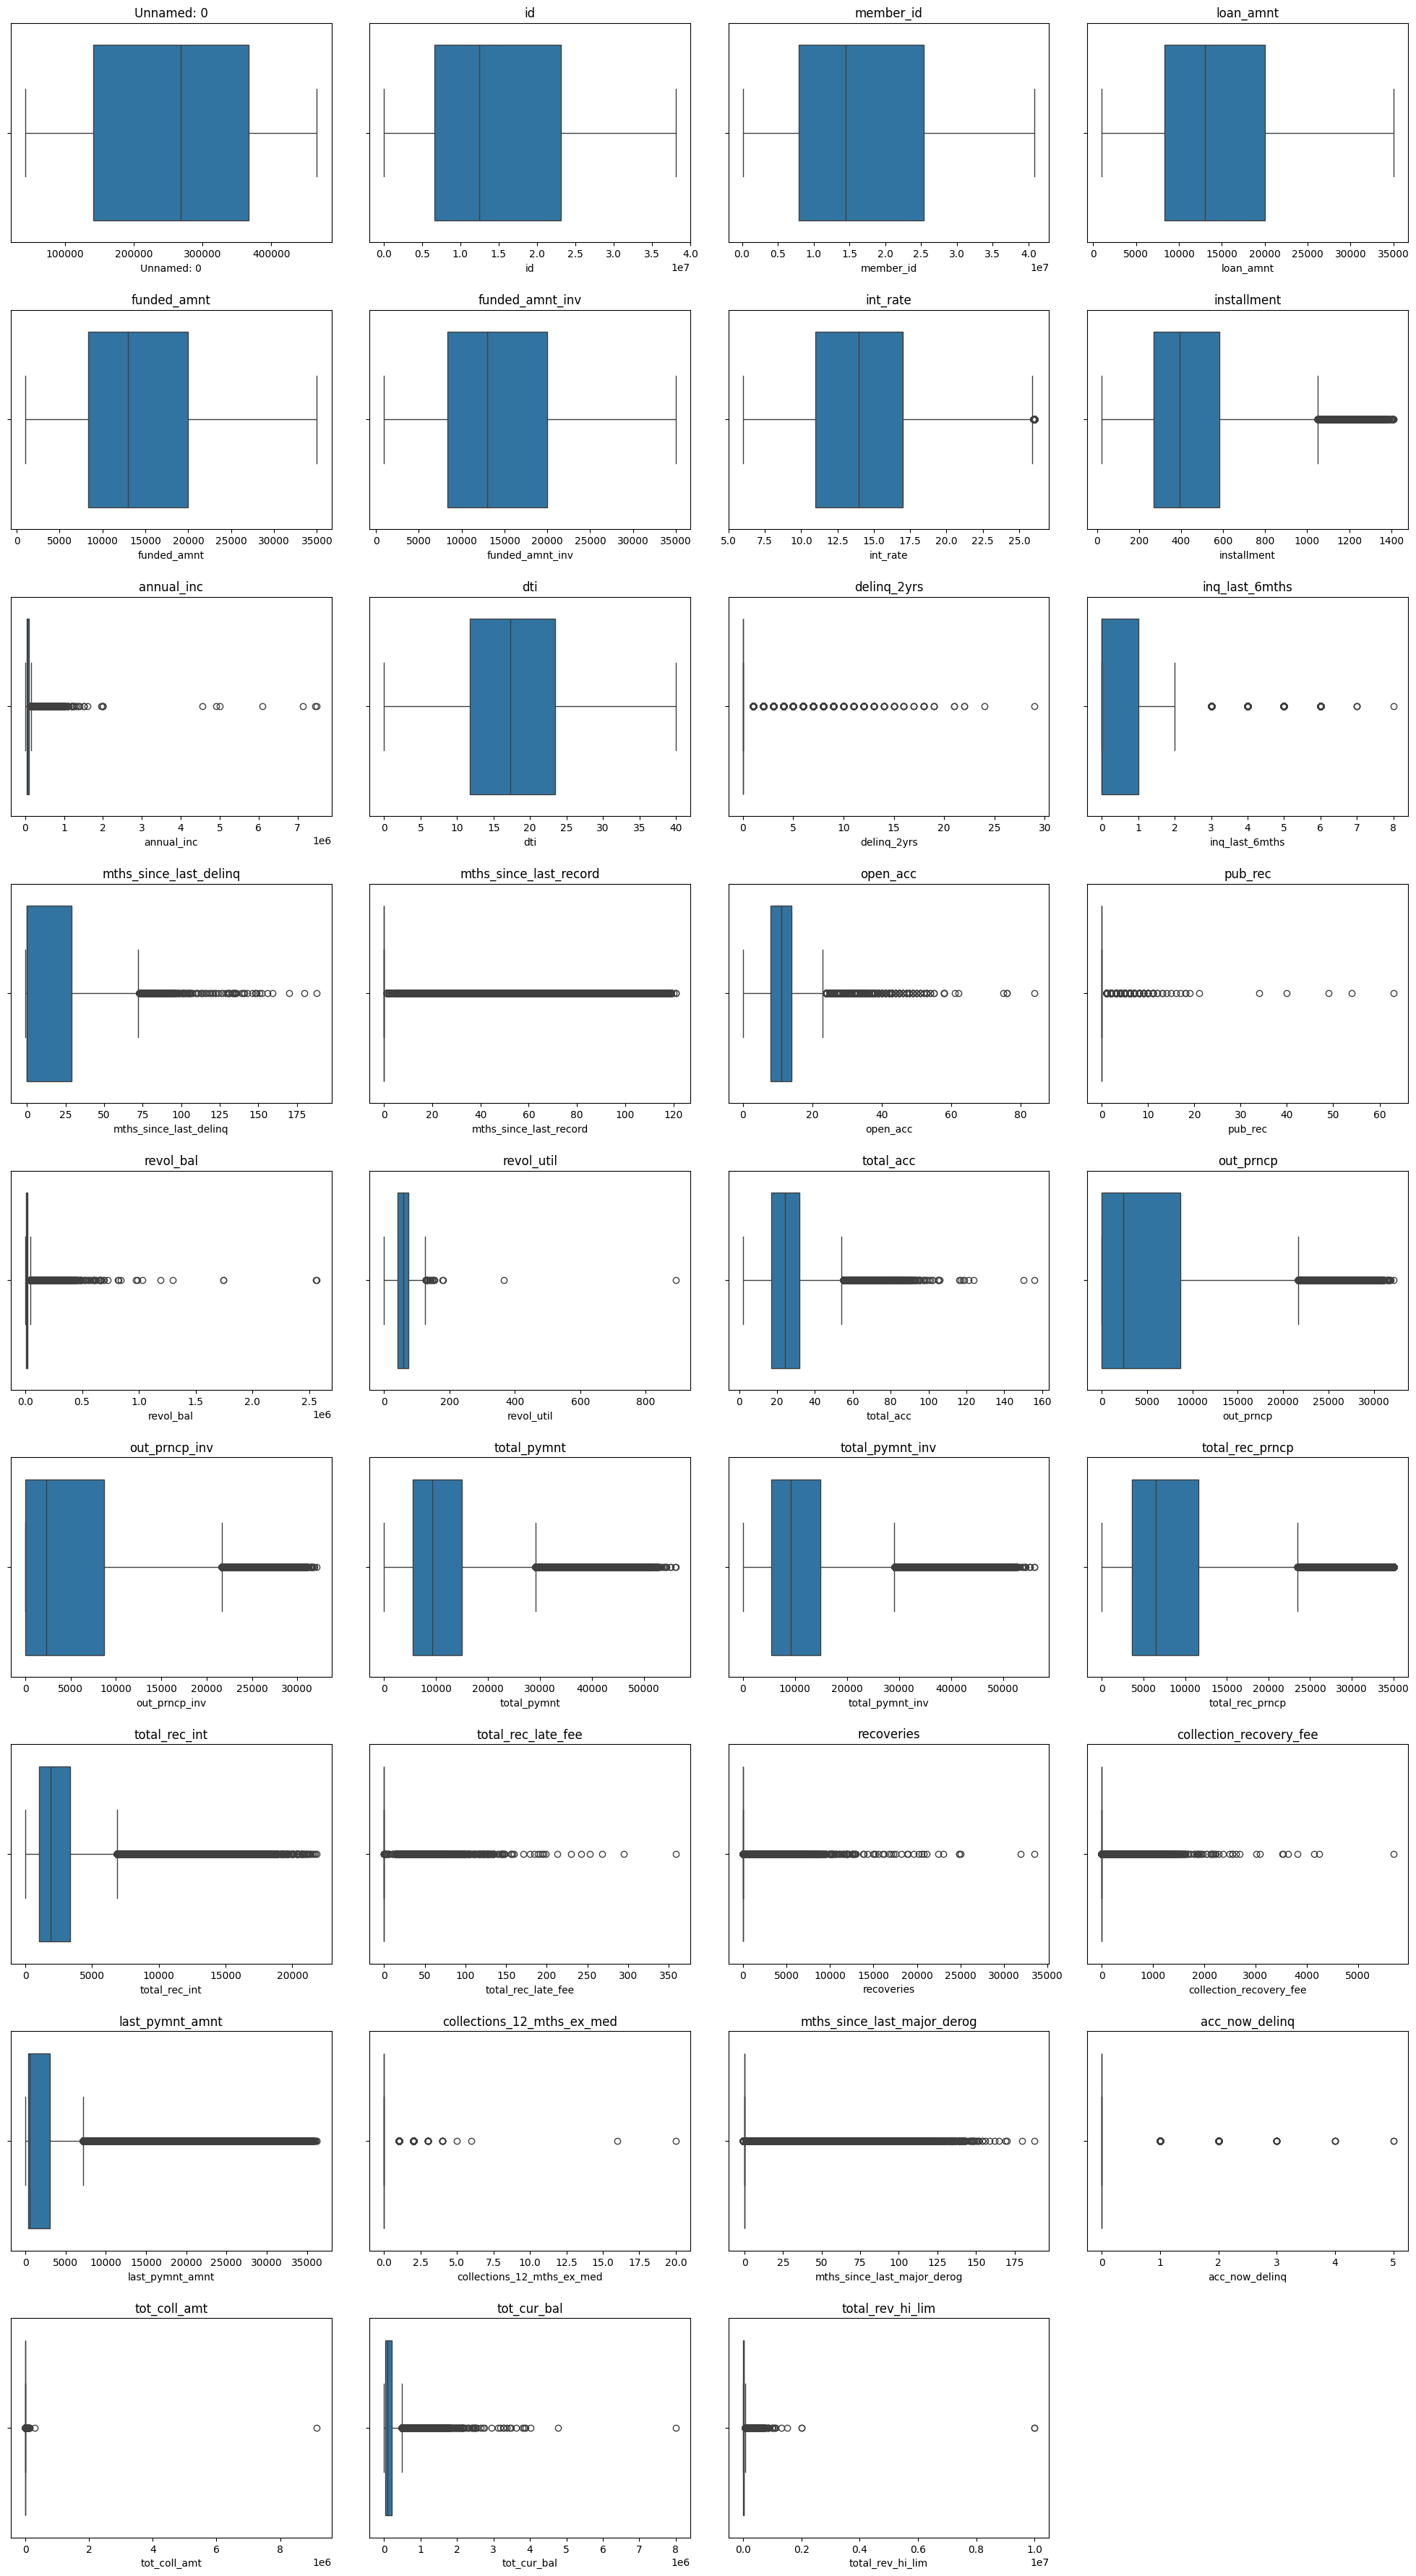

In [ ]:
# Plot Outlier
plot_outliers(data, num_columns)

In [70]:
print(data.columns)

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='ob

In [71]:
num_columns = data.select_dtypes(include=["number"]).columns.tolist()
num_columns

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

In [72]:
print(num_columns)

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']


In [73]:
def outlier(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    count = ((series < lower_bound) | (series > upper_bound)).sum()
    return count, upper_bound, lower_bound

In [74]:
def lihat_outlier(data, num_cols):
    # Simpan outlier
    outlier_dict = {}

    for col in num_cols:
        # Pastikan kolom numerik (biar tidak error kalau ada string)
        if not pd.api.types.is_numeric_dtype(data[col]):
            continue

        count, upper, lower = outlier(data[col])

        if count > 0:
            outlier_dict[col] = count  # simpan hanya kolom yang punya outlier

    # Sort hasilnya dari terbanyak
    outlier_sorted = dict(sorted(outlier_dict.items(), key=lambda item: item[1], reverse=True))

    # Tampilkan
    for col, val in outlier_sorted.items():
        print(f'Total outlier di kolom {col}: {val} ({((val/len(data)) * 100):.2f}%)')

    print(f'\nTotal kolom dengan outlier: {len(outlier_sorted)} dari {len(num_cols)}')

lihat_outlier(data, num_columns)


Total outlier di kolom mths_since_last_major_derog: 183624 (39.39%)
Total outlier di kolom delinq_2yrs: 83281 (17.87%)
Total outlier di kolom last_pymnt_amnt: 70287 (15.08%)
Total outlier di kolom pub_rec: 61352 (13.16%)
Total outlier di kolom mths_since_last_record: 61349 (13.16%)
Total outlier di kolom tot_coll_amt: 49750 (10.67%)
Total outlier di kolom inq_last_6mths: 36754 (7.88%)
Total outlier di kolom total_rec_int: 31133 (6.68%)
Total outlier di kolom total_rev_hi_lim: 25714 (5.52%)
Total outlier di kolom recoveries: 24352 (5.22%)
Total outlier di kolom out_prncp_inv: 23326 (5.00%)
Total outlier di kolom out_prncp: 23319 (5.00%)
Total outlier di kolom collection_recovery_fee: 23187 (4.97%)
Total outlier di kolom revol_bal: 22869 (4.91%)
Total outlier di kolom tot_cur_bal: 21064 (4.52%)
Total outlier di kolom total_rec_prncp: 20648 (4.43%)
Total outlier di kolom annual_inc: 19885 (4.27%)
Total outlier di kolom total_pymnt_inv: 19037 (4.08%)
Total outlier di kolom total_pymnt: 190

> Total kolom yang terdiri dari outlier adalah 29 dari 34. Maka dari itu perlu dilakukan pendekatan untuk menjaga kualitas data tanpa berdampak terhadap data lainnya. dilakukan metode capping.

In [75]:
def cap_outlier(data, num_columns):
  for col in num_columns:
    result = outlier(data[col])
    data[col] = data[col].clip(result[2], result[1])
  return data

# Panggil Fungsi
data_cap = cap_outlier(data, num_columns)

# Lihat Outlier
lihat_outlier(data_cap, num_columns)



Total kolom dengan outlier: 0 dari 34


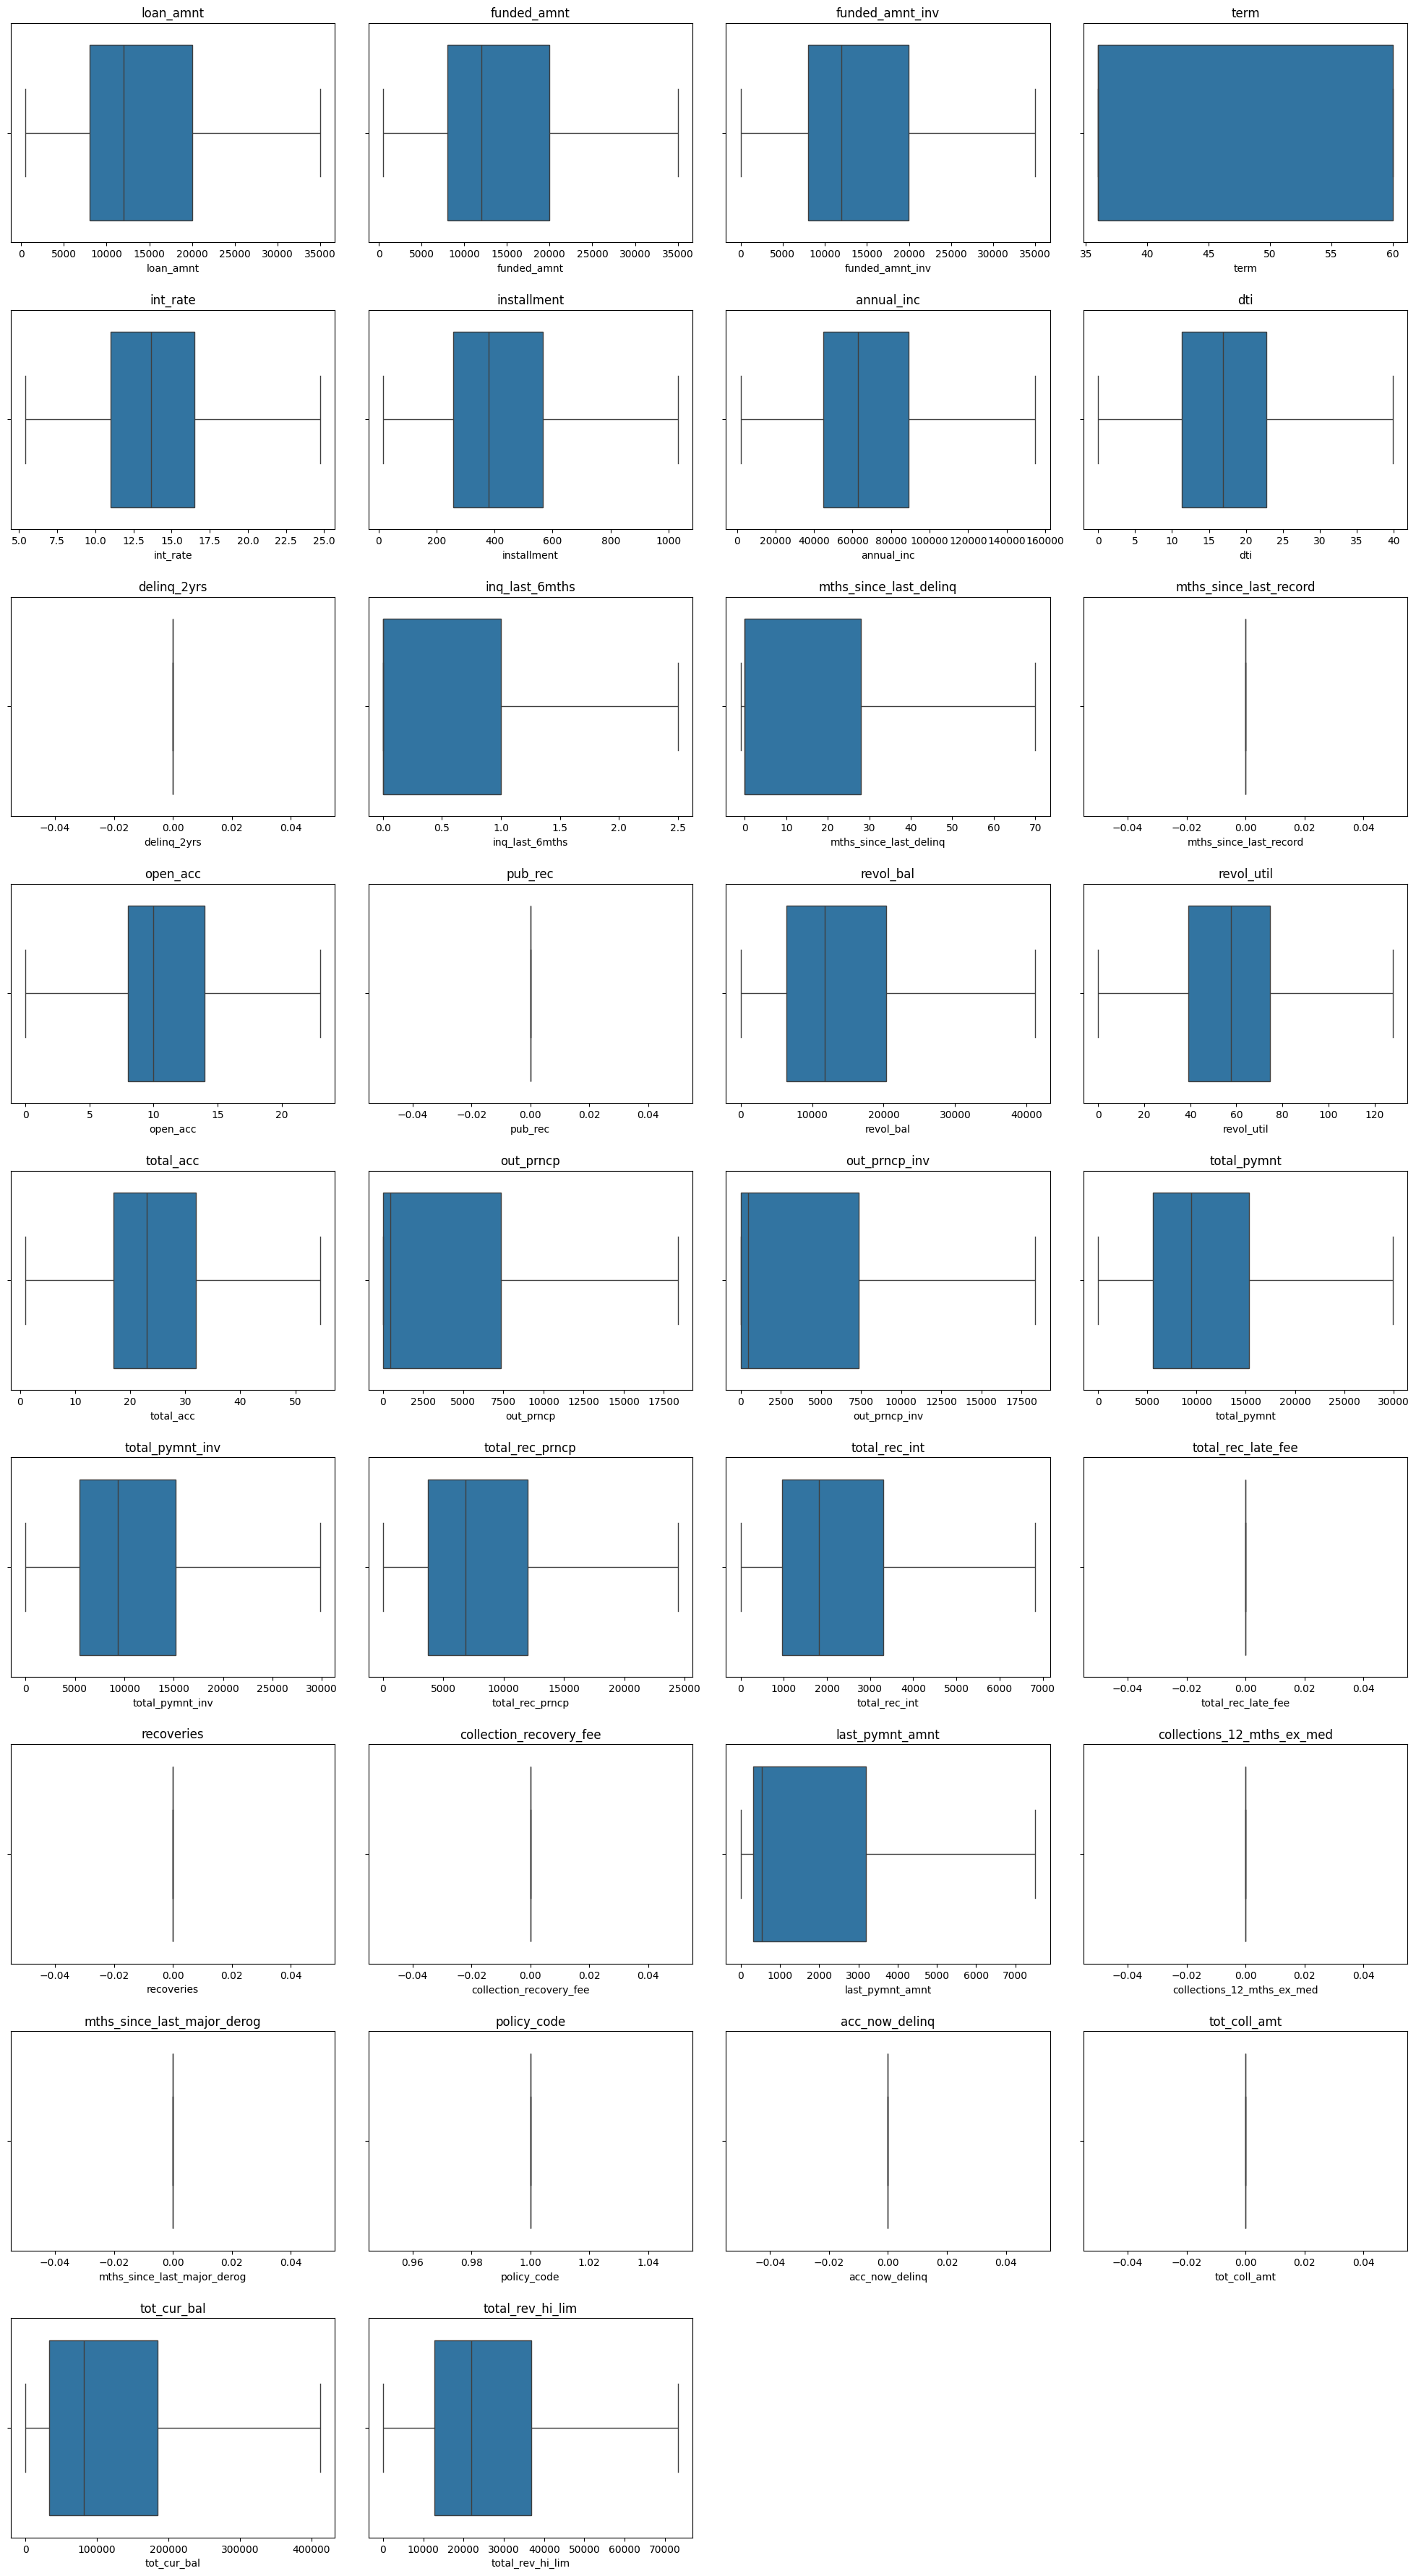

In [ ]:
# Visualisasi setelah dilakukan capping
plot_outliers(data_cap, num_columns)

## Penentuan Label

## Encoding

###Cek Cardinality

In [76]:
def cek_cardinality(data, threshold=20):
    cat_cols = data_cap.select_dtypes(include=['object', 'category']).columns

    hasil = {}
    for col in cat_cols:
        unique_vals = data[col].nunique()
        total_vals = len(data[col])
        distribusi = data[col].value_counts(normalize=True).head(5)  # top 5 kategori

        kategori = "Low Cardinality" if unique_vals <= threshold else "High Cardinality"

        hasil[col] = {
            "Unique Values": unique_vals,
            "Total Rows": total_vals,
            "Kategori": kategori,
            "Top 5 Distribusi": distribusi.to_dict()
        }

    return hasil

cardinality_info = cek_cardinality(data, threshold=20)

# tampilkan hasil
for col, info in cardinality_info.items():
    print(f"\nKolom: {col}")
    print(f" - Unique Values : {info['Unique Values']}")
    print(f" - Total Rows    : {info['Total Rows']}")
    print(f" - Kategori      : {info['Kategori']}")
    print(f" - Top 5 Distribusi:")
    for k, v in info['Top 5 Distribusi'].items():
        print(f"    {k}: {v:.2%}")



Kolom: grade
 - Unique Values : 7
 - Total Rows    : 466140
 - Kategori      : Low Cardinality
 - Top 5 Distribusi:
    B: 29.37%
    C: 26.87%
    D: 16.49%
    A: 16.05%
    E: 7.67%

Kolom: sub_grade
 - Unique Values : 35
 - Total Rows    : 466140
 - Kategori      : High Cardinality
 - Top 5 Distribusi:
    B3: 6.80%
    B4: 6.54%
    C1: 5.78%
    C2: 5.73%
    B2: 5.71%

Kolom: emp_title
 - Unique Values : 205392
 - Total Rows    : 466140
 - Kategori      : High Cardinality
 - Top 5 Distribusi:
    Missing: 5.91%
    Teacher: 1.16%
    Manager: 0.95%
    Registered Nurse: 0.50%
    RN: 0.47%

Kolom: emp_length
 - Unique Values : 12
 - Total Rows    : 466140
 - Kategori      : Low Cardinality
 - Top 5 Distribusi:
    10+ years: 32.19%
    2 years: 8.87%
    3 years: 7.85%
    < 1 year: 7.77%
    5 years: 6.60%

Kolom: home_ownership
 - Unique Values : 6
 - Total Rows    : 466140
 - Kategori      : Low Cardinality
 - Top 5 Distribusi:
    MORTGAGE: 50.59%
    RENT: 40.42%
    OWN: 

In [77]:
# Hapus kolom dengan nilai unik yang tinggi atau nilai unik hanya 1
data_cap = data_cap.drop(columns=['emp_title', 'url', 'desc', 'title', 'zip_code', 'last_pymnt_d', 'next_pymnt_d','last_credit_pull_d', 'application_type'])


In [78]:
data_cap.select_dtypes('object', 'category').columns

Index(['grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 'pymnt_plan', 'purpose',
       'addr_state', 'initial_list_status'],
      dtype='object')

In [79]:
print(data_cap['grade'])

0         B
1         C
2         C
3         C
4         B
         ..
466280    C
466281    D
466282    D
466283    A
466284    D
Name: grade, Length: 466140, dtype: object


In [80]:
# Cek Jumlah Target (loan_status)
jml_loan_status = data_cap['loan_status'].value_counts()
jml_loan_status

loan_status
Current                                                224226
Fully Paid                                             184689
Charged Off                                             42469
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1921
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       739
Name: count, dtype: int64

##Binning

loan_status sebagai label target akan dikelompokkan menjadi

- Class 0: Low Risk (Good) - Risiko gagal bayar rendah

"Fully Paid", "Current", 'Does not meet the credit policy. Status:Fully Paid'

- Class 1: High Risk (Bad) - Risiko gagal bayar tinggi

'Charged Off', 'Default', 'Late (16-30 days)', 'Late (31-120 days)', 'Does not meet the credit policy. Status:Charged Off', 'In Grace Period'


In [81]:
def map_loan_risk(status):
  good_risk = {
      "Fully Paid",
      "Current",
      "Does not meet the credit policy. Status:Fully Paid"
  }
  if status in good_risk:
    return "Low Risk (Good)"
  else:
    return "High Risk (Bad)"

In [82]:
data_cap["credit_risk"] = data_cap["loan_status"].apply(map_loan_risk)

In [83]:
# Mapping target untuk high-risk dan low-risk

# 0 : low/good risk; 1: high/bad risk
risk_map = {
    'Fully Paid': 0,
    'Current': 0,
    'Does not meet the credit policy. Status:Fully Paid': 0,
    'Charged Off': 1,
    'Default': 1,
    'Late (16-30 days)': 1,
    'Late (31-120 days)': 1,
    'Does not meet the credit policy. Status:Charged Off': 1,
    'In Grace Period': 1
}

# Mapping ke kolom baru
data_cap["loan_risk"] = data_cap["loan_status"].map(risk_map)

# Tampilkan Perubahan
display(data_cap[["loan_status", "loan_risk"]].head(10))


loan_status  loan_risk
0   Fully Paid          0
1  Charged Off          1
2   Fully Paid          0
3   Fully Paid          0
4      Current          0
5   Fully Paid          0
6      Current          0
7   Fully Paid          0
8  Charged Off          1
9  Charged Off          1

In [ ]:
# Drop kolom loan_status
data_cap = data_cap.drop(columns=["loan_status"])

In [84]:
# Grouping addr_state berdasarkan region
state_to_region = {
    **dict.fromkeys(['CT', 'MA', 'ME', 'NH', 'RI', 'VT', 'NJ', 'NY', 'PA'], 'NorthEast'),
    **dict.fromkeys(['IL', 'IN', 'MI', 'OH', 'WI', 'IA', 'KS', 'MN', 'MO', 'NE', 'SD'], 'MidWest'),
    **dict.fromkeys(['DC', 'DE', 'FL', 'GA', 'MD', 'NC', 'SC', 'VA', 'WV', 'AL', 'KY', 'MS', 'TN', 'AR', 'LA', 'OK', 'TX'], 'South'),
    **dict.fromkeys(['AZ', 'CO', 'ID', 'MT', 'NV', 'NM', 'UT', 'WY', 'AK', 'CA', 'HI', 'OR', 'WA'], 'West')
}

# Apply mapping
data_cap['state_region'] = data_cap['addr_state'].map(state_to_region)

# Tampilkan perubahan
display(data_cap[['addr_state', 'state_region']].head(10))

addr_state state_region
0         AZ         West
1         GA        South
2         IL      MidWest
3         CA         West
4         OR         West
5         AZ         West
6         NC        South
7         CA         West
8         CA         West
9         TX        South

In [ ]:
# Drop addr_state
data_cap = data_cap.drop(columns=['addr_state'])

In [85]:
# Grouping purposed berdasarkan broader
purpose_group = {
    **dict.fromkeys(['credit_card', 'debt_consolidation'], 'Debt Management'),
    **dict.fromkeys(['small_business', 'educational'], 'Business & Education'),
    **dict.fromkeys(['home_improvement', 'house', 'renewable_energy', 'major_purchase', 'car'], 'Home & Major Purchases'),
    **dict.fromkeys(['medical', 'moving', 'vacation', 'wedding'], 'Personal & Lifestyle'),
    **dict.fromkeys(['other'], 'Other')
}

# Apply Mapping
data_cap['purpose_grouped'] = data_cap['purpose'].map(purpose_group)

# Tampilkan
display(data_cap[['purpose', 'purpose_grouped']].head(10))

purpose         purpose_grouped
0         credit_card         Debt Management
1                 car  Home & Major Purchases
2      small_business    Business & Education
3               other                   Other
4               other                   Other
5             wedding    Personal & Lifestyle
6  debt_consolidation         Debt Management
7                 car  Home & Major Purchases
8      small_business    Business & Education
9               other                   Other

In [ ]:
# drop kolom
data_cap = data_cap.drop(columns=['purpose'])

### Encoding `emp_length`

In [86]:
# map emp_length ke numerik berdasarkan employment year
emp_length_map = {
    '< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3,
    '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7,
    '8 years': 8, '9 years': 9, '10+ years': 10, 'Not Recorded': -1}

data_cap['emp_length'] = data_cap['emp_length'].map(emp_length_map)

In [87]:
# Encoding
data_cap['pymnt_plan'] = data_cap['pymnt_plan'].map({'n': 0, 'y': 1})
data_cap['initial_list_status'] = data_cap['initial_list_status'].map({'f': 0, 'w':1})


##Ordinal Encoding

In [88]:
# Ordinal Encoding untuk grade & sub_grade
grade_encode = {
    'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7
}

# Apply mapping
data_cap['grade'] = data_cap['grade'].map(grade_encode)

# Encode sub_grade
sub_grade_ord = sorted(data_cap['sub_grade'].unique())
sub_grade_map = {sub_grade: i+1 for i, sub_grade in enumerate(sub_grade_ord)}

# Apply mapping
data_cap['sub_grade'] = data_cap['sub_grade'].map(sub_grade_map)

# Tampilkan
data_cap[['grade', 'sub_grade']].head(10)

grade  sub_grade
0      2          7
1      3         14
2      3         15
3      3         11
4      2         10
5      1          4
6      3         15
7      5         21
8      6         27
9      2         10

## One-Hot Encoding

In [89]:
cat_column = data_cap.select_dtypes('object').columns
cat_column

Index(['home_ownership', 'verification_status', 'loan_status', 'purpose',
       'addr_state', 'credit_risk', 'state_region', 'purpose_grouped'],
      dtype='object')

In [91]:
# Tampilkan nilai unik kolom kategorikal
for col in cat_column:
  print(f'Unique values of {col}: \n{data_cap[col].unique()}')

Unique values of home_ownership: 
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
Unique values of verification_status: 
['Verified' 'Source Verified' 'Not Verified']
Unique values of loan_status: 
['Fully Paid' 'Charged Off' 'Current' 'Default' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off']
Unique values of purpose: 
['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']
Unique values of addr_state: 
['AZ' 'GA' 'IL' 'CA' 'OR' 'NC' 'TX' 'VA' 'MO' 'CT' 'UT' 'FL' 'NY' 'PA'
 'MN' 'NJ' 'KY' 'OH' 'SC' 'RI' 'LA' 'MA' 'WA' 'WI' 'AL' 'CO' 'KS' 'NV'
 'AK' 'MD' 'WV' 'VT' 'MI' 'DC' 'SD' 'NH' 'AR' 'NM' 'MT' 'HI' 'WY' 'OK'
 'DE' 'MS' 'TN' 'IA' 'NE' 'ID' 'IN' 'ME']
Unique values of credit_risk: 
['Low Risk (Good)' 'High Risk (Bad)']
Unique values of 

In [92]:
# pd.get_dummies()
data_cap = pd.get_dummies(data_cap, columns=cat_column, drop_first=True)

# df info after encoding
data_cap.info()

# display result
display(data_cap.head(10))

<class 'pandas.core.frame.DataFrame'>
Index: 466140 entries, 0 to 466284
Columns: 127 entries, loan_amnt to purpose_grouped_Personal & Lifestyle
dtypes: bool(85), datetime64[ns](2), float64(31), int64(9)
memory usage: 190.7 MB


loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
0       5000         5000           4975.0    36     10.65       162.87   
1       2500         2500           2500.0    60     15.27        59.83   
2       2400         2400           2400.0    36     15.96        84.33   
3      10000        10000          10000.0    36     13.49       339.31   
4       3000         3000           3000.0    60     12.69        67.79   
5       5000         5000           5000.0    36      7.90       156.46   
6       7000         7000           7000.0    60     15.96       170.08   
7       3000         3000           3000.0    36     18.64       109.43   
8       5600         5600           5600.0    60     21.28       152.39   
9       5375         5375           5350.0    60     12.69       121.45   

   grade  sub_grade  emp_length  annual_inc  ... addr_state_WV  addr_state_WY  \
0      2          7        10.0     24000.0  ...         False          False   
1      3         14         0.0     30000.0  ...         False          False   
2      3         15        10.0     12252.0  ...         False          False   
3      3         11        10.0     49200.0  ...         False          False   
4      2         10         1.0     80000.0  ...         False          False   
5      1          4         3.0     36000.0  ...         False          False   
6      3         15         8.0     47004.0  ...         False          False   
7      5         21         9.0     48000.0  ...         False          False   
8      6         27         4.0     40000.0  ...         False          False   
9      2         10         0.0     15000.0  ...         False          False   

   credit_risk_Low Risk (Good)  state_region_NorthEast state_region_South  \
0                         True                   False              False   
1                        False                   False               True   
2                         True                   False              False   
3                         True                   False              False   
4                         True                   False              False   
5                         True                   False              False   
6                         True                   False               True   
7                         True                   False              False   
8                        False                   False              False   
9                        False                   False               True   

   state_region_West  purpose_grouped_Debt Management  \
0               True                             True   
1              False                            False   
2              False                            False   
3               True                            False   
4               True                            False   
5               True                            False   
6              False                             True   
7               True                            False   
8               True                            False   
9              False                            False   

   purpose_grouped_Home & Major Purchases  purpose_grouped_Other  \
0                                   False                  False   
1                                    True                  False   
2                                   False                  False   
3                                   False                   True   
4                                   False                   True   
5                                   False                  False   
6                                   False                  False   
7                                    True                  False   
8                                   False                  False   
9                                   False                   True   

   purpose_grouped_Personal & Lifestyle  
0                 

## Feature Selection

- Untuk mengurangi dimensi dataset
- Mempertahankan fitur paling relevan untuk menentukan label

Tahapan:
1. Hapus fitur berkorelasi tinggi
2. Gunakan embedded method dengan Random Forest Classifier

###Scaling

In [93]:
data_cap.select_dtypes('datetime').columns

Index(['issue_d', 'earliest_cr_line'], dtype='object')

In [94]:
# Drop tipe data datetime sebelum scaling
data_cap = data_cap.drop(columns=['issue_d', 'earliest_cr_line'])

Ubah tipe data boolean menjadi integer

In [95]:
bool_col = data_cap.select_dtypes('bool').columns

In [96]:
# Konversi boolean columns ke int
data_cap[bool_col] = data_cap[bool_col].astype(int)

In [97]:
data_cap.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466140 entries, 0 to 466284
Columns: 125 entries, loan_amnt to purpose_grouped_Personal & Lifestyle
dtypes: float64(31), int64(94)
memory usage: 448.1 MB


###Split Data untuk Target

In [98]:
# Bagi target variable
X = data_cap.drop('loan_risk', axis=1)
y = data_cap['loan_risk']

# Tentukan korelasi features berdasarkan threshold
corr_matrix = X.corr()
high_corr_feats = set()
threshold = 0.85

# Tentukan kolom
for i in range(len(corr_matrix.columns)):
  for j in range(i):

    if abs(corr_matrix.iloc[i, j]) > threshold:
      col_name = corr_matrix.columns[i]
      high_corr_feats.add(col_name)

print(f'Kolom dengan korelasi tinggi (> 0.85): {high_corr_feats}')

# Drop
X_filtered = X.drop(columns=high_corr_feats)

Kolom dengan korelasi tinggi (> 0.85): {'funded_amnt_inv', 'grade', 'purpose_grouped_Other', 'total_rec_prncp', 'sub_grade', 'out_prncp_inv', 'total_pymnt_inv', 'installment', 'funded_amnt'}


In [99]:
X_filtered.dtypes

loan_amnt                                   int64
term                                        int64
int_rate                                  float64
emp_length                                float64
annual_inc                                float64
                                           ...   
state_region_South                          int64
state_region_West                           int64
purpose_grouped_Debt Management             int64
purpose_grouped_Home & Major Purchases      int64
purpose_grouped_Personal & Lifestyle        int64
Length: 115, dtype: object

In [100]:
X_filtered = X_filtered.select_dtypes(exclude=["datetime64[ns]"])

In [101]:
# feature selection dengan random forest classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_filtered, y)

# feature importances
feature_importance = pd.Series(model.feature_importances_, index=X_filtered.columns)

# Pilih top 12 features
top_12_feats = feature_importance.sort_values(ascending=False).head(12)
top_12_feats_name = top_12_feats.index.tolist()

# Tampilkan
display(top_12_feats)

credit_risk_Low Risk (Good)       0.483073
loan_status_Fully Paid            0.154661
loan_status_Current               0.115908
out_prncp                         0.062712
last_pymnt_amnt                   0.042046
loan_status_Late (31-120 days)    0.040175
total_pymnt                       0.027983
loan_status_In Grace Period       0.017013
loan_amnt                         0.009767
int_rate                          0.007645
total_rec_int                     0.005311
loan_status_Late (16-30 days)     0.004468
dtype: float64

In [102]:
# update X setelah feature selection
X_selected = X[top_12_feats_name]
X_selected

credit_risk_Low Risk (Good)  loan_status_Fully Paid  \
0                                 1                       1   
1                                 0                       0   
2                                 1                       1   
3                                 1                       1   
4                                 1                       0   
...                             ...                     ...   
466280                            1                       0   
466281                            0                       0   
466282                            1                       0   
466283                            1                       1   
466284                            1                       0   

        loan_status_Current  out_prncp  last_pymnt_amnt  \
0                         0       0.00           171.62   
1                         0       0.00           119.66   
2                         0       0.00           649.91   
3                         0       0.00           357.48   
4                         1     766.90            67.79   
...                     ...        ...              ...   
466280                    1   12574.00           432.64   
466281                    0       0.00            17.50   
466282                    1   14428.31           514.34   
466283                    0       0.00          1500.68   
466284                    1    3984.38           367.58   

        loan_status_Late (31-120 days)   total_pymnt  \
0                                    0   5861.071414   
1                                    0   1008.710000   
2                                    0   3003.653644   
3                                    0  12226.302210   
4                                    0   3242.170000   
...                                ...           ...   
466280                               0  10383.360000   
466281                               0   4677.920000   
466282                               0  12343.980000   
466283                               0   2126.579838   
466284                               0   8821.620000   

        loan_status_In Grace Period  loan_amnt  int_rate  total_rec_int  \
0                                 0       5000     10.65         861.07   
1                                 0       2500     15.27         435.17   
2                                 0       2400     15.96         603.65   
3                                 0      10000     13.49        2209.33   
4                                 0       3000     12.69        1009.07   
...                             ...        ...       ...            ...   
466280                            0      18400     14.47        4557.36   
466281                            0      22000     19.97        2840.88   
466282                            0      20700     16.99        6072.29   
466283                            0       2000      7.90         126.58   
466284                            0      10000     19.20        2806.00   

        loan_status_Late (16-30 days)  
0                                   0  
1                                   0  
2                                   0  
3                                   0  
4                                   0  
...                               ...  
466280                              0  
466281                              0  
466282                              0  
466283                              0  
466284                              0  

[466140 rows x 12 columns]

##Feature Scaling

In [103]:
# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Convert scaled array ke dataframe
X_scaled = pd.DataFrame(X_scaled, columns=top_12_feats_name, index=X.index)
X_scaled

credit_risk_Low Risk (Good)  loan_status_Fully Paid  \
0                          0.366897                1.234471   
1                         -2.725561               -0.810064   
2                          0.366897                1.234471   
3                          0.366897                1.234471   
4                          0.366897               -0.810064   
...                             ...                     ...   
466280                     0.366897               -0.810064   
466281                    -2.725561               -0.810064   
466282                     0.366897               -0.810064   
466283                     0.366897                1.234471   
466284                     0.366897               -0.810064   

        loan_status_Current  out_prncp  last_pymnt_amnt  \
0                 -0.962748  -0.731074        -0.690925   
1                 -0.962748  -0.731074        -0.709876   
2                 -0.962748  -0.731074        -0.516482   
3                 -0.962748  -0.731074        -0.623138   
4                  1.038694  -0.597534        -0.728794   
...                     ...        ...              ...   
466280             1.038694   1.458422        -0.595725   
466281            -0.962748  -0.731074        -0.747136   
466282             1.038694   1.781310        -0.565927   
466283            -0.962748  -0.731074        -0.206187   
466284             1.038694  -0.037279        -0.619454   

        loan_status_Late (31-120 days)  total_pymnt  \
0                            -0.122576    -0.724486   
1                            -0.122576    -1.373124   
2                            -0.122576    -1.106450   
3                            -0.122576     0.126384   
4                            -0.122576    -1.074567   
...                                ...          ...   
466280                       -0.122576    -0.119970   
466281                       -0.122576    -0.882643   
466282                       -0.122576     0.142115   
466283                       -0.122576    -1.223693   
466284                       -0.122576    -0.328735   

        loan_status_In Grace Period  loan_amnt  int_rate  total_rec_int  \
0                         -0.082431  -1.124762 -0.731433      -0.813767   
1                         -0.082431  -1.426473  0.333841      -1.038198   
2                         -0.082431  -1.438541  0.492940      -0.949416   
3                         -0.082431  -0.521340 -0.076590      -0.103291   
4                         -0.082431  -1.366131 -0.261053      -0.735777   
...                             ...        ...       ...            ...   
466280                    -0.082431   0.492409  0.149378       1.134021   
466281                    -0.082431   0.926872  1.417561       0.229509   
466282                    -0.082431   0.769983  0.730436       1.932324   
466283                    -0.082431  -1.486815 -1.365525      -1.200811   
466284                    -0.082431  -0.521340  1.240015       0.211129   

        loan_status_Late (16-30 days)  
0                           -0.051184  
1                           -0.051184  
2                           -0.051184  
3                           -0.051184  
4                           -0.051184  
...                               ...  
466280                      -0.051184  
466281                      -0.051184  
466282                      -0.051184  
466283                      -0.051184  
466284                      -0.051184  

[466140 rows x 12 columns]

##Splitting Data

In [104]:
# Split data ke training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.1, random_state=42, shuffle=True)

print(f'Training set: {X_train.shape}')
print(f'Testing set: {X_test.shape}')

Training set: (419526, 12)
Testing set: (46614, 12)


In [105]:
# Cek proporsi class
y.value_counts(normalize=True)

loan_risk
0    0.881358
1    0.118642
Name: proportion, dtype: float64

Distribusi kelas tidak seimbang antara low risk: 0 dan high risk: 1. Hal ini akan menyebabkan model bias, perlu resampling

## Resampling dengan SMOTE

In [106]:
# Resampling: SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_tr_resampled, y_tr_resampled = smote.fit_resample(X_train, y_train)

In [107]:
# Cek kembali proporsi label
print(pd.Series(y_tr_resampled.value_counts(normalize=True)))

loan_risk
0    0.5
1    0.5
Name: proportion, dtype: float64


Setelah resampling dengan SMOTE terlihat proporsi sudah seimbang

# Data Modelling

- Pilih model

- Pelatihan model pada training set.

- Penyesuaian parameter model menggunakan teknik seperti cross-validation atau grid search.

- Evaluasi kinerja model menggunakan metrik (akurasi, presisi, recall, atau ROC-AUC).

- Periksa overfitting atau underfitting model dan mengambil tindakan yang sesuai.



Model 1

- Logistic Regression

Model 2

- Random Forest

Model 3

- XGBBoost

###Function

- `learning_curve_plot()` digunakan untuk identifikasi potensi overfitting dan underfitting

- `train_test_acc()` mengetahui nilai akurasi training & train test

- `evaluate_model()` melihat hasil evaluasi

- ` cm_visualization()` melihat confusion matrix dengan heatmap



In [108]:
from sklearn.model_selection import learning_curve, StratifiedKFold

# learning curve plot
def learning_curve_plot(model, X, y, cv=5):
  # Definisikan cross-validation dengan stratifiedkfold
  cv = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)

  # learning curve
  train_sizes, train_scores, test_scores = learning_curve(
      model, X, y, cv=cv, scoring='accuracy',
      n_jobs=4, train_sizes=np.linspace(0.3, 1.0, 5)
  )

  # Hitung mean and standard deviation
  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)
  test_mean = np.mean(test_scores, axis=1)
  test_std = np.std(test_scores, axis=1)

  # plot
  plt.figure(figsize=(10,8))
  plt.plot(train_sizes, train_mean, 'o-', color='skyblue', label='Training Accuracy')
  plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='skyblue', alpha=0.2)

  plt.plot(train_sizes, test_mean, 'o-', color='dustypink', label='Cross-Validation Accuracy')
  plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='dustypink', alpha=0.2)

  plt.xlabel('Ukuran Training Set')
  plt.ylabel('Akurasi')
  plt.title(f'{model.__class__.__name__} Learning Curve')
  plt.legend()
  plt.show()


In [109]:
# function untuk evaluasi training and testing accuracy
def train_test_acc(model, X_train, y_train, X_test, y_test):
  train = model.score(X_train, y_train)
  test = model.score(X_test, y_test)

  print(f'Training accuracy: {train:.3f}')
  print(f'Testing accuracy: {test:.3f}')

In [110]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [111]:
# Evaluasi model: metrics, confusion matrix, & classification reports

def evaluate_model(model, X, y, cv=5):
  # model prediction dengan cross-validation
  y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
  y_pred_prob = cross_val_predict(model, X, y, cv=cv, method='predict_prob')[:, 1]

  # confusion matrix
  cm = confusion_matrix(y_test, y_pred)

  # classification report
  cr = classification_report(y_test, y_pred)

  # cross-validation metric scores
  accuracy = np.round(np.mean(cross_val_score(model, X, y, cv=cv, scoring='accuracy', n_jobs=-1)), 3)
  precision = np.round(np.mean(cross_val_score(model, X, y, cv=cv, scoring='precision', n_jobs=-1)), 3)
  recall = np.round(np.mean(cross_val_score(model, X, y, cv=cv, scoring='recall', n_jobs=-1)), 3)
  f1_score = np.round(np.mean(cross_val_score(model, X, y, cv=cv, scoring='f1', n_jobs=-1)), 3)
  roc_auc = np.round(roc_auc_score(y, y_pred_prob), 3)

  # display information
  print(f'{model.__class__.__name__} ')
  print('\nConfusion Matrix')
  print(cm)
  print('\nMetrics Score (Cross-Validated)')
  print(f'Accuracy: {accuracy}')
  print(f'Precision: {precision}')
  print(f'Recall: {recall}')
  print(f'F1-Score: {f1_score}')
  print(f'ROC-AUC: {roc_auc}')
  print('\nClassification Report')
  print(cr)

  # Summary
  summary = {
      'Confusion Matrix': cm,
      'Accuracy': accuracy,
      'Precision': precision,
      'Recall': recall,
      'F1-Score': {f1_score},
      'ROC-AUC': {roc_auc}
  }

  return summary

In [112]:
from sklearn.metrics import confusion_matrix
from matplotlib.colors import LinearSegmentedColormap

In [113]:
# function untuk visualisasi confusion matrix
def cm_visualization(model, cm, labels):
  cm_perc = cm / cm.sum()

  base_labels = np.array([['TP', 'FP'], ['FN', 'TN']])
  labels_annot = np.array([
        f'{label}\n{count} ({perc:.2%})'
        for label, count, perc in zip(base_labels.flatten(), cm.flatten(), cm_perc.flatten())
  ]).reshape(2, 2)

  plt.figure(figsize=(8, 6))
  sns.heatmap(
        cm, annot=labels_annot, fmt='', cmap=orange, cbar=False,
        annot_kws={'size': 13, 'weight': 'bold'}, linewidths=2, linecolor='black',
        xticklabels=['Low-Risk (0)', 'High-Risk (1)'],
        yticklabels=['Low-Risk (0)', 'High-Risk (1)'],
        vmin=0, vmax=cm.max()
  )

  plt.title(f'{model.__class__.__name__} Confusion Matrix')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

1. Logistic Regression

In [115]:
# Buat model Logistic Regression
# Menentukan jumlah iterasi maksimum

model1 = LogisticRegression(class_weight='balanced', max_iter=1000, solver='saga', random_state=42)

ValueError: 'dustypink' is not a valid value for color: supported inputs are (r, g, b) and (r, g, b, a) 0-1 float tuples; '#rrggbb', '#rrggbbaa', '#rgb', '#rgba' strings; named color strings; string reprs of 0-1 floats for grayscale values; 'C0', 'C1', ... strings for colors of the color cycle; and pairs combining one of the above with an alpha value

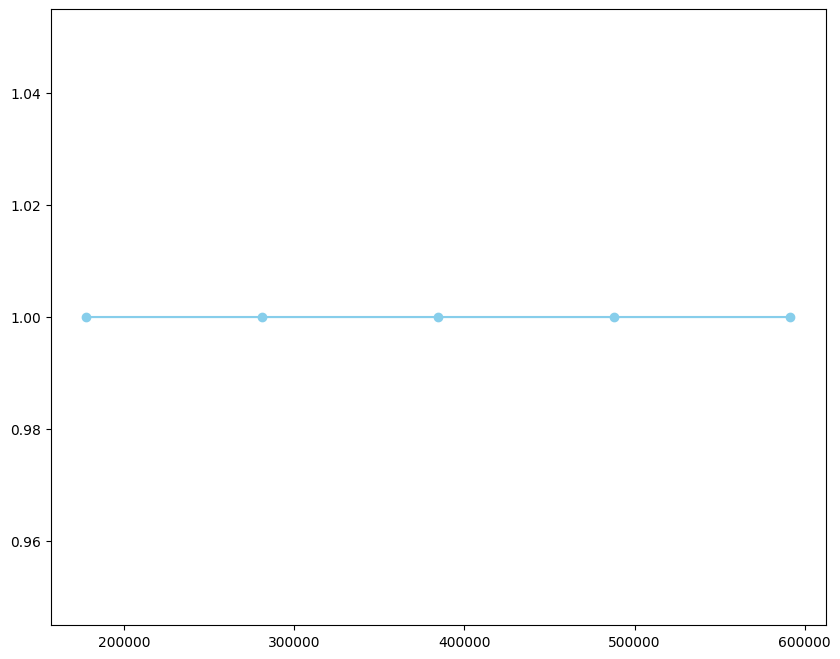

In [116]:
# learning curve
learning_curve_plot(model1, X_tr_resampled, y_tr_resampled)

In [ ]:
# model training
model1.fit(X_tr_resampled, y_tr_resampled)

NameError: name 'X_tr_resampled' is not defined

In [ ]:
# model evaluation
model1_result = evaluate_model(model1, X_test, y_test)

In [ ]:
# training and testing accuracy
train_test_acc(model1, X_tr_resampled, y_tr_resampled, X_test, y_test)

In [ ]:
# confusion matrix visualization
cm_visualization(model1, model1_result['Confusion Matrix'], labels=np.unique(y_test))

> Hasil Evaluasi Model (Sebelum Tuning)

- **Akurasi** model mencapai 0.925, tetapi bisa menyesatkan (misleading) karena pada learning curve, terlihat bahwa akurasi training cenderung menurun dan bisa mengindikasikan *underfitting*. Hal ini juga didukung oleh gap yang cukup besar antara training dan testing accuracy.

- **Precision** cukup rendah (0.627) yang berarti model berpotensi salah mengklasifikasikan calon peminjam yang sebenarnya tergolong "good risk" sebagai "bad risk" sehingga pengajuan mereka berkemungkinan ditolak.

- **Recall** sebesar 0.827 yang berarti model cukup baik dalam mengidentifikasi peminjam dengan risiko kredit tinggi (bad risk).

- *F1-Score moderat* karena dipengaruhi oleh precision yang rendah.

- **ROC-AUC** yang sangat tinggi menunjukkan bahwa model dapat membedakan kategori "Good Risk" dan "Bad Risk" dengan baik.

In [ ]:

# Latih model dengan data training
model.fit(X_train, y_train)

# Uji model dengan data testing
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model pada data testing:: {accuracy}")
print("\nLaporan Klasifikasi pada data testing:")
print(classification_report(y_test, y_pred))

# Catatan hasil epengujian
print("\nHasil Pengujian Model:")
print(f"- Algoritma yang digunakan: Logistic Regression")
print(f"- Fitur yang digunakan: {selected_features}")
print(f"- Akurasi model: {accuracy}")
print(f"- Parameter model: max_iter={model.max_iter}")
print("- Laporan Klasifikasi:")
print(classification_report(y_test, y_pred))

# Simpan hasil pengujian ke dalam file (opsional)
with open('hasil_pengujian_model.txt', 'w') as f:
  f.write(f"Akurasi: {accuracy}\n")
  f.write("Laporan Klasifikasi:\n")
  f.write(classification_report(y_test, y_pred))

print("\nHasil pengujian telah dicatat.")

2. Random Forest

In [ ]:
# random forest classifier model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# model training
rf.fit(X_tr_resampled, y_tr_resampled)

In [ ]:
# model evaluation
rf_result = evaluate_model(rf, X_test, y_test)

In [ ]:
# training and testing accuracy gap
train_test_acc(rf, X_tr_resampled, y_tr_resampled, X_test, y_test)

In [ ]:
# confusion matrix visualization
cm_visualization(rf, rf_result['Confusion Matrix'], labels=np.unique(y_test))

> Hasil Evaluasi Model (Sebelum Tuning)

- Akurasi yang sangat tinggi, tetapi berkemungkinan mengalami overfitting terlihat dari training accuracy = 1.0 (sempurna), yang berarti model hanya menghafal data latih tanpa generalisasi yang baik.

- Precision sangat tinggi (0.993) yang berarti model hampir tidak memiliki kasus false positive (peminjam dengan risiko tinggi yang diklasifikasikan sebagai "good risk").

- Recall sebesar 0.764, lebih rendah dibandingkan model Logistic Regression.

- F1-Score dan ROC-AUC lebih tinggi dibandingkan model sebelumnya, tetapi tetap perlu diwaspadai karena indikasi overfitting.

3. XGBoost

In [ ]:
# XGBoost model
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

In [ ]:
# learning curve
learning_curve_plot(xgb, X_tr_resampled, y_tr_resampled)

In [ ]:
# model training
xgb.fit(X_tr_resampled, y_tr_resampled)

In [ ]:
# model evaluation
xgb_result = evaluate_model(xgb, X_test, y_test)

In [ ]:
# training and testing accuracy gap
train_test_acc(xgb, X_tr_resampled, y_tr_resampled, X_test, y_test)

In [ ]:
# confusion matrix visualization
cm_visualization(xgb, xgb_result['Confusion Matrix'], labels=np.unique(y_test))

> Hasil Evaluasi Model (Sebelum Tuning)

- Akurasi mencapai 0.976.

- Meskipun learning curve menunjukkan sedikit penurunan pada training accuracy, perbedaannya tidak signifikan, dan gap antara training dan testing accuracy sangat kecil, menandakan model ini melakukan generalisasi dengan lebih baik.

- Precision, F1-Score, dan ROC-AUC tinggi menunjukkan performa yang baik dalam mengklasifikasikan risiko kredit.

- Recall lebih rendah dibandingkan Logistic Regression, tetapi tetap mendekati 0.8 sehingga masih cukup baik dalam mendeteksi peminjam dengan risiko kredit tinggi.

#Optimasi Parameter Model (Hyperparameter Tuning)


> Hyperparameter Tuning dilakukan terhadap dua model, yaitu, **Logistic Regression** dan **Random Forest Classifier**

- Logistic Regression menggunakan GridSearchCV karena parameter yang perlu dicoba relatif lebih sedikit dan menggunakan komputasi yang lebih ringan.

- Random Forest Classifier menggunakan RandomizedSearchCV untuk mengurangi biaya komputasi.

Logistic Regression

- GridSearchCV

In [ ]:
# baseline model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# define param grid
log_reg_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'saga', 'liblinear'],
    'class_weight': [None, 'balanced']
}

# initialize GridSearchCV
grid_log_reg = GridSearchCV(estimator=log_reg, param_grid=log_reg_param_grid, cv=3, n_jobs=1, verbose=2)
grid_log_reg.fit(X_tr_resampled, y_tr_resampled)

# save best model
print(f'Grid Search Logistic Regression Best Params: {grid_log_reg.best_params_}')
best_lr_grid = grid_log_reg.best_estimator_


In [ ]:
# learning curve after tuning
learning_curve_plot(best_lr_grid, X_tr_resampled, y_tr_resampled)

In [ ]:
# model evaluation after tuning
best_lr_result = evaluate_model(best_lr_grid, X_test, y_test)

In [ ]:
# training and testing accuracy gap
train_test_acc(best_lr_grid, X_tr_resampled, y_tr_resampled, X_test, y_test)

> Hasil evaluasi model setelah hyperparameter tuning tidak menunjukkan perbedaan yang signifikan. Namun, nilai precision menjadi jauh lebih meningkat, sementara recall sedikit menurun tetapi masih dalam batasan yang baik. Hal ini menyebabkan peningkatan terhadap nilai f1-score juga. Oleh karena itu, model ini digunakan sebagai representasi model Logistic Regression untuk dibandingkan dengan model lainnya.

Random Forest

- RandomizedCV

In [ ]:
# baseline model
random_forest = RandomForestClassifier(random_state=42)

# param dist
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 7, 10, 12, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

# initialize RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    estimator=random_forest, param_distributions=param_dist, n_iter=3, scoring='f1', cv=3, n_jobs=-1, verbose=2, random_state=42
    )
random_search_rf.fit(X_tr_resampled, y_tr_resampled)

# save best model
print(f'Random Search RF Best Params: {random_search_rf.best_params_}')
best_rf_random = random_search_rf.best_estimator_

In [ ]:
# model evaluation after tuning
best_rf_result = evaluate_model(best_rf_random, X_test, y_test)

In [ ]:
# training and testing accuracy gap
train_test_acc(best_rf_random, X_tr_resampled, y_tr_resampled, X_test, y_test)

> Model Random Forest setelah melalui proses tuning mengalami peningkatan performa dan tidak terlalu overfitting (terlihat dari gap antara training dan testing accuracy yang lebih kecil serta training accuracy yang tidak lagi 1.0). Oleh karena itu, model ini dipilih sebagai representasi Random Forest Classifier untuk dibandingkan dengan model lainnya.

## Evaluasi

In [ ]:
print(best_lr_result)
print(best_rf_result)
print(xgb_result)

> Kode di atas menampilkan hasil evaluasi model yang tersimpan dalam bentuk dictionary. Namun, nilai F1-Score dan ROC-AUC tersimpan dalam bentuk set sehingga perlu diekstraksi terlebih dahulu sebelum dimasukkan ke dalam tabel hasil evaluasi.

In [ ]:
# function to extract the value inside the set for f1-score and roc-auc
def extract_value_set(metrics_dict):
  for key, value in metrics_dict.items():
    if isinstance(value, set):
      metrics_dict[key] = list(value)[0]
  return metrics_dict

In [ ]:
# model summary dict
model_summary = {
    'Logistic Regression': extract_value_set(best_lr_result),
    'Random Forest': extract_value_set(best_rf_result),
    'XGBBoost': extract_value_set(xgb_result)
}

# model summary dataframe
summary_df = pd.DataFrame.from_dict(model_summary, orient='index')[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']]

summary_df.reset_index(inplace=True)
summary_df.rename(columns={'index': 'Model'}, inplace=True)

summary_df

In [ ]:
# visualize the metrics score
def plot_model_performance(df, metrics):
  df_melted = df.melt(id_vars=['Model'], value_vars=metrics, var_name='Metric', value_name='Score')

  fig, axes = plt.subplots(1, len(metrics), figsize=(18,5), sharey=True)

  for i, metric in enumerate(metrics):
    ax = axes[i]
    sns.barplot(data=df_melted[df_melted['Metric'] == metric],
                x='Model',
                y='Score',
                ax=ax,
                hue='Model',
                palette='viridis')

    ax.set_title(metric, fontsize=12),
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticks(range(len(df['Model'])))
    ax.set_xticklabels(df['Model'], rotation=30)

    for p in ax.patches:
      ax.text(p.get_x() + p.get_width() / 2,
              p.get_height() + 0.01,
              f'{p.get_height():.3f}',
              ha='center', va='bottom', fontsize=10)

  plt.tight_layout()
  plt.show()

In [ ]:
# function call
plot_model_performance(summary_df, ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'])


> Kesimpulan

- XGBoost adalah model dengan performa keseluruhan terbaik.

- Random Forest Classifier menempati peringkat kedua dalam performa, meskipun **cenderung rentan terhadap overfitting***. Hal ini telah diminimalkan dengan melakukan *hyperparameter tuning menggunakan RandomizedSearchCV untuk menghindari komputasi yang terlalu berat.

- Logistic Regression menunjukkan indikasi underfitting yang terlihat dari learning curve, baik sebelum maupun setelah tuning.

- Ketiga model memiliki precision yang sangat baik, tetapi nilai recall cenderung rendah, kecuali XGBoost. Hal ini menjadi perhatian apabila recall diutamakan (untuk mengidentifikasi bad risks dengan lebih akurat).

- Nilai F1-score ketiga model melebihi 0.8 yang menunjukkan bahwa model sudah cukup baik dalam menyeimbangkan precision dan recall.

Penilaian Hasil Pemodelan

Parameter Evaluasi
Akurasi
Presisi
Recall
F1-Score
MAE

Dokumentasikan hasil penilaian dengan menyertakan analisis terhadap nilai kesuksesan model yang memberikan informasi tentang pencapaian tujuan bisnis. Sertakan rekomendasi untuk perbaikan model jika diperlukan.